In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pandas as pd
from pathlib import Path

os.environ['pRT_input_data_path'] = os.path.join('/home/mvasist/pRT/input_data_v2.4.9/input_data')
from petitRADTRANS import nat_cst as nc

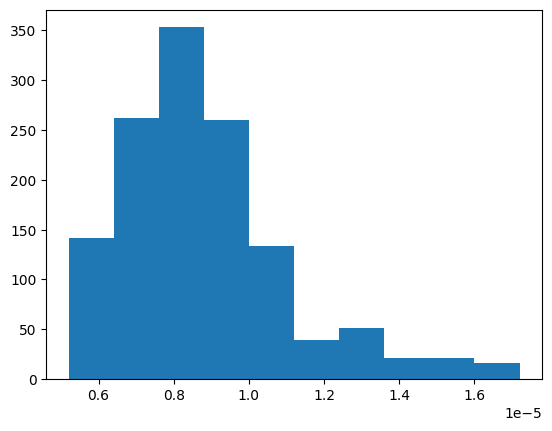

In [3]:
## observation
obsHST_file = Path('/home/mvasist/WISEJ1738/observation') / 'HST/WISEJ1738_HST.txt'
obs_hst_pd = pd.read_csv(obsHST_file, header=0, delimiter = ',')
obs_wlen_hst = np.array(obs_hst_pd.iloc[:,0])
obs_hst = np.array(obs_hst_pd.iloc[:, 1]*1e1*1e30 * (obs_wlen_hst*1e-4)**2/nc.c) 
sigmaH = np.array(obs_hst_pd.iloc[:,2]*1e1*1e30 * (obs_wlen_hst*1e-4)**2/nc.c)

obs_miri_pd = pd.read_csv('/home/mvasist/WISEJ1738/observation/MIRI/unconvolved/spectrum_reprocessed231123.csv')
obs_wlen_miri  = np.array(obs_miri_pd.iloc[:, 0])
obs_miri = np.array(obs_miri_pd.iloc[:, 1])
sigmaM = np.array(obs_miri_pd.iloc[:, 2])

plt.hist(sigmaM)

## observation
obs_gemini_pd = pd.read_csv('/home/mvasist/WISEJ1738/observation/NIRGemini/spectrum_gemini.csv', float_precision='round_trip')
obs_wlen_gemini = obs_gemini_pd.iloc[:,0].values
obs_gemini = np.array(obs_gemini_pd.iloc[:, 1])
sigmaG = np.array(obs_gemini_pd.iloc[:, 2])

#scaling for distance for the NN
D = 7.34
obs_hst = obs_hst *1e5 * (D/9.9)**2  
sigmaH = sigmaH * (D/9.9)**2
obs_miri = obs_miri *1e5 * (D/9.9)**2
sigmaM = sigmaM * (D/9.9)**2
obs_gemini = obs_gemini *1e5 * (D/9.9)**2  
sigmaG = sigmaG * (D/9.9)**2


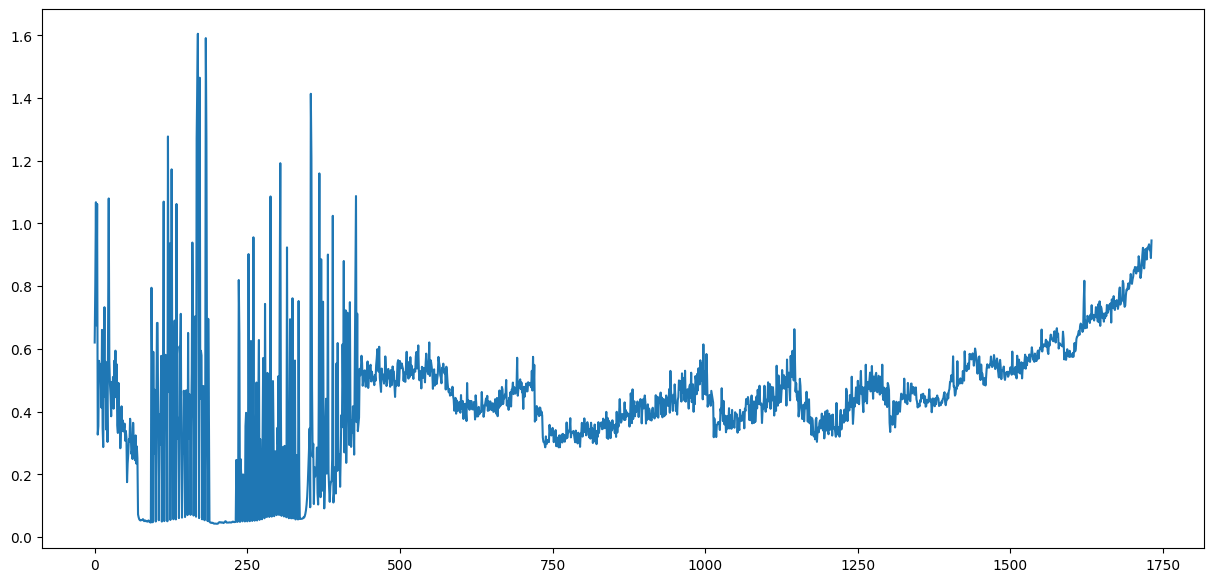

(0.04215474300317012, 1.6050866968229405)

In [4]:
obs_wlen_inst = np.append(obs_wlen_hst, obs_wlen_gemini)
index_argsort = np.argsort(obs_wlen_inst)

obs_inst_app = np.append(obs_hst, obs_gemini)
obs_inst = obs_inst_app[index_argsort]
x_star_hg = np.append(obs_inst, obs_miri)

plt.figure(figsize=(15,7))
sigma_inst = np.append(sigmaH, sigmaG)[index_argsort]
s = np.append(sigma_inst, sigmaM)
plt.plot(s*1e5)
plt.show()

np.min(s*1e5), np.max(s*1e5)


## Helena's spectrum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


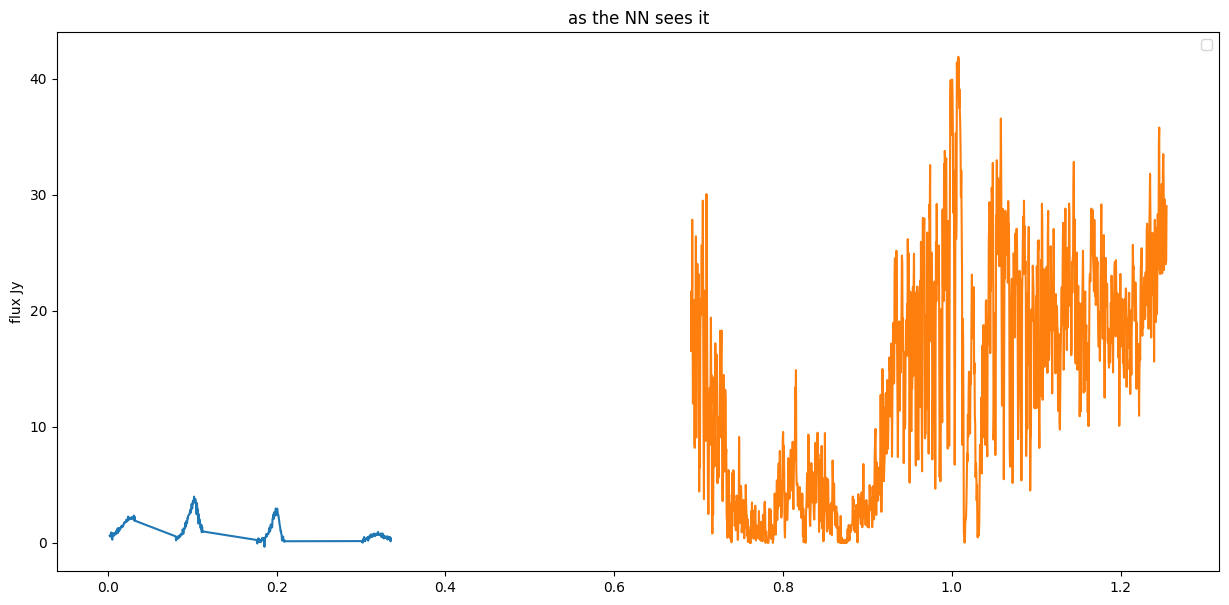

In [4]:
plt.figure(figsize=(15,7))
plt.plot(np.log10(obs_wlen_gemini), obs_gemini)
plt.plot(np.log10(obs_wlen_miri), obs_miri)
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


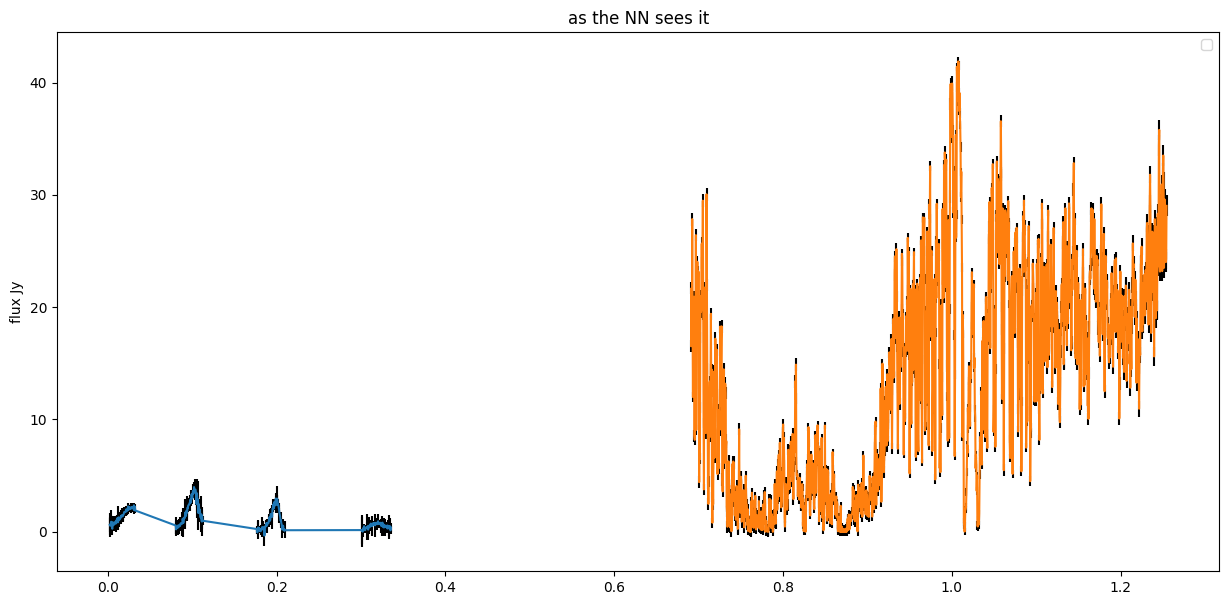

In [5]:
plt.figure(figsize=(15,7))
plt.errorbar(np.log10(obs_wlen_gemini), obs_gemini, yerr= sigmaG*1e5, ecolor='black')
plt.errorbar(np.log10(obs_wlen_miri), obs_miri, yerr= sigmaM*1e5, ecolor='black')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


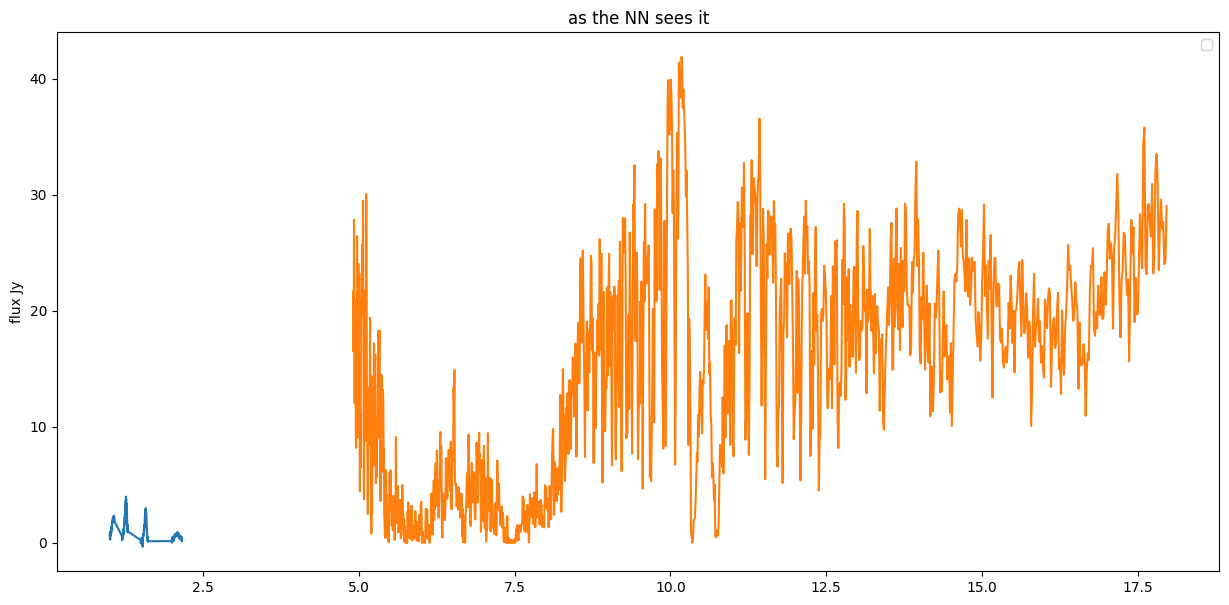

In [6]:
plt.figure(figsize=(15,7))
plt.plot(obs_wlen_gemini, obs_gemini)
plt.plot(obs_wlen_miri, obs_miri)
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


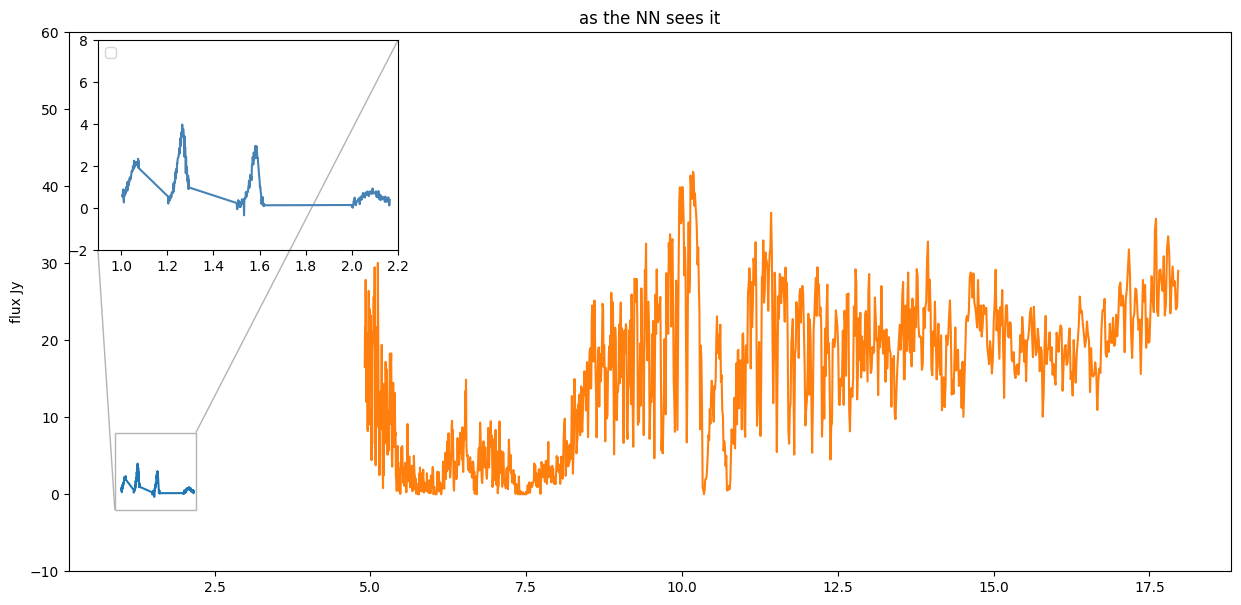

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes


# Create main figure and axes
fig, ax = plt.subplots(figsize=(15,7))
# ax.plot(x, y, label='Main Figure')

ax.plot(obs_wlen_gemini, obs_gemini)
ax.plot(obs_wlen_miri, obs_miri)
ax.set_ylabel('flux Jy')
ax.set_ylim(-10, 60)
plt.title('as the NN sees it')

# Create inset axes and plot
# ax_inset = zoomed_inset_axes(ax, zoom=2, loc='upper left', borderpad = 3, bbox_to_anchor=(170, 700, 10, 1))
ax_inset = inset_axes(ax, 3, 8 , loc=2, bbox_to_anchor=(0.14, 1.3), bbox_transform=ax.figure.transFigure) # no zoom

ax_inset.set_box_aspect(0.7)
ax_inset.plot(obs_wlen_miri, obs_miri)
ax_inset.plot(obs_wlen_gemini, obs_gemini, color = 'steelblue')
ax_inset.set_xlim(0.9, 2.2)  # Set limits for the zoomed-in area
ax_inset.set_ylim(-2, 8)
mark_inset(ax, ax_inset, loc1=1, loc2=3, fc="none", ec="0.7")  # Mark the zoomed-in area on the main figure
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


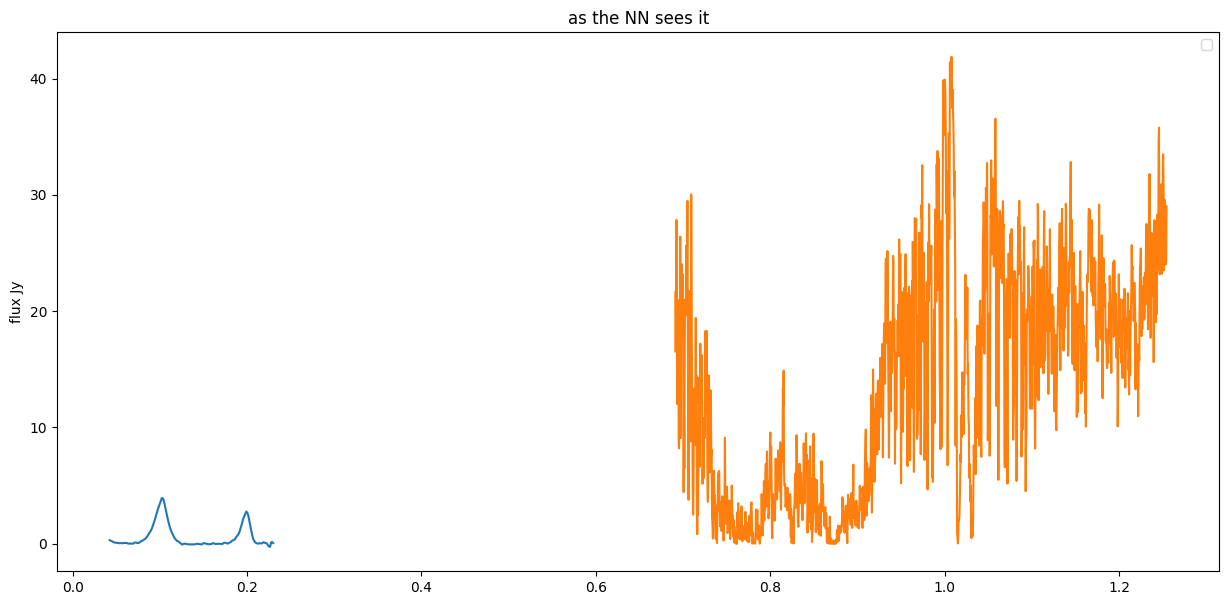

In [8]:
plt.figure(figsize=(15,7))
plt.plot(np.log10(obs_wlen_hst), obs_hst)
plt.plot(np.log10(obs_wlen_miri), obs_miri)
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


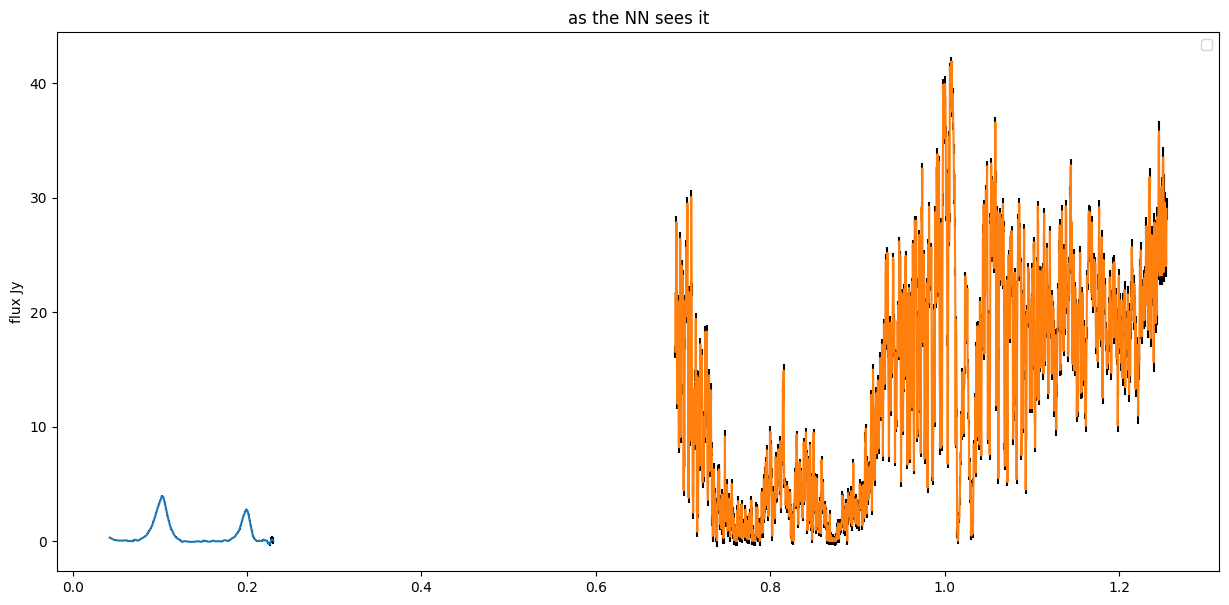

In [9]:
plt.figure(figsize=(15,7))
plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr= sigmaH*1e5, ecolor='black')
plt.errorbar(np.log10(obs_wlen_miri), obs_miri, yerr= sigmaM*1e5, ecolor='black')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

In [10]:
# plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr=sigmaH*1e5, ecolor='black')

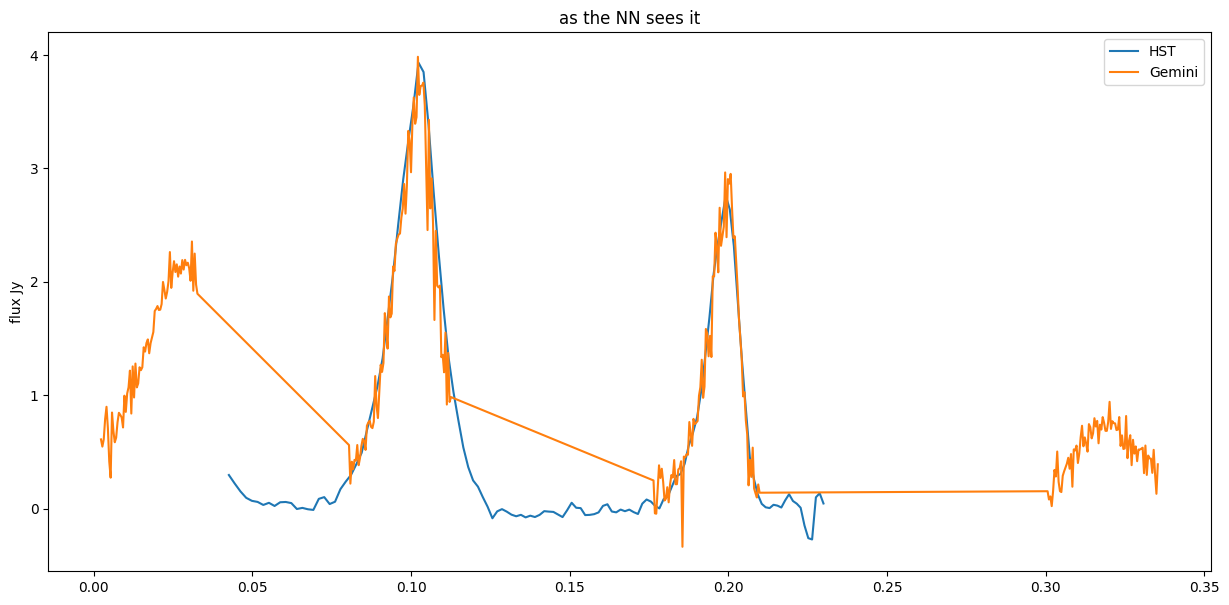

In [11]:
plt.figure(figsize=(15,7))
plt.plot(np.log10(obs_wlen_hst), obs_hst, label = 'HST')
plt.plot(np.log10(obs_wlen_gemini), obs_gemini, label = 'Gemini')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

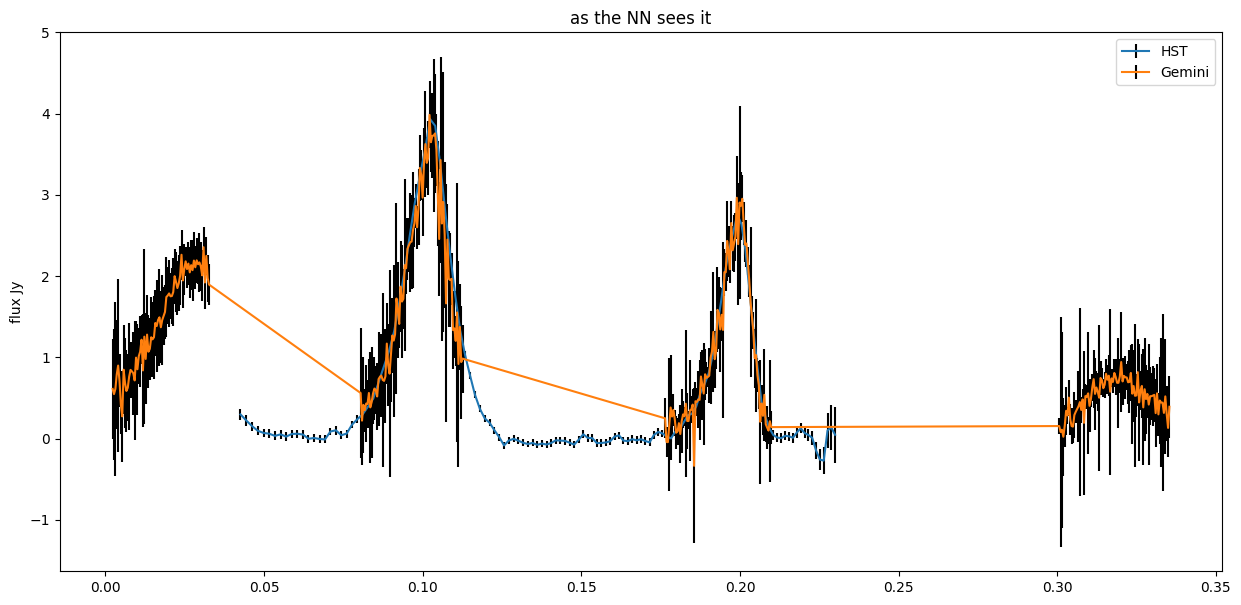

In [12]:
plt.figure(figsize=(15,7))
plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr= sigmaH*1e5, ecolor= 'black', label = 'HST')
plt.errorbar(np.log10(obs_wlen_gemini), obs_gemini, yerr= sigmaG*1e5, ecolor= 'black', label = 'Gemini')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

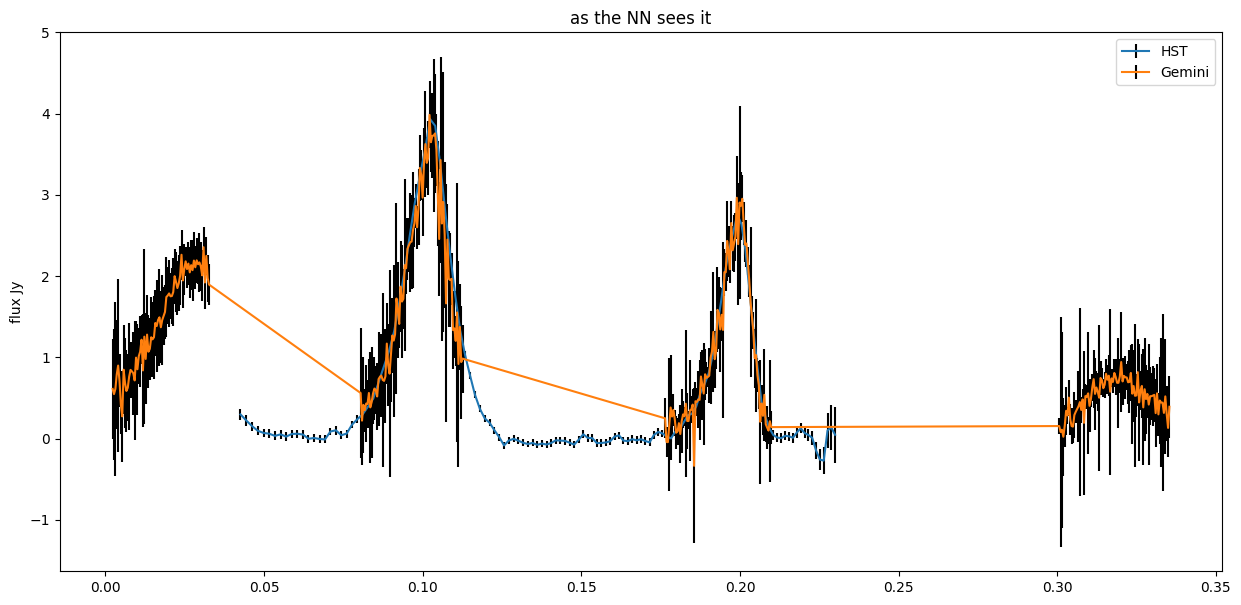

In [13]:
plt.figure(figsize=(15,7))
plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr= sigmaH*1e5, ecolor= 'black', label = 'HST')
plt.errorbar(np.log10(obs_wlen_gemini), obs_gemini, yerr= sigmaG*1e5, ecolor= 'black', label = 'Gemini')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

In [14]:
obs_wlen_hst, obs_wlen_gemini

(array([1.103  , 1.10765, 1.1123 , 1.11695, 1.1216 , 1.12625, 1.1309 ,
        1.13555, 1.1402 , 1.14485, 1.1495 , 1.15415, 1.1588 , 1.16345,
        1.1681 , 1.17275, 1.1774 , 1.18205, 1.1867 , 1.19135, 1.196  ,
        1.20065, 1.2053 , 1.20995, 1.2146 , 1.21925, 1.2239 , 1.22855,
        1.2332 , 1.23785, 1.2425 , 1.24715, 1.2518 , 1.25645, 1.2611 ,
        1.26575, 1.2704 , 1.27505, 1.2797 , 1.28435, 1.289  , 1.29365,
        1.2983 , 1.30295, 1.3076 , 1.31225, 1.3169 , 1.32155, 1.3262 ,
        1.33085, 1.3355 , 1.34015, 1.3448 , 1.34945, 1.3541 , 1.35875,
        1.3634 , 1.36805, 1.3727 , 1.37735, 1.382  , 1.38665, 1.3913 ,
        1.39595, 1.4006 , 1.40525, 1.4099 , 1.41455, 1.4192 , 1.42385,
        1.4285 , 1.43315, 1.4378 , 1.44245, 1.4471 , 1.45175, 1.4564 ,
        1.46105, 1.4657 , 1.47035, 1.475  , 1.47965, 1.4843 , 1.48895,
        1.4936 , 1.49825, 1.5029 , 1.50755, 1.5122 , 1.51685, 1.5215 ,
        1.52615, 1.5308 , 1.53545, 1.5401 , 1.54475, 1.5494 , 1.55405,
      

In [15]:
obs_wlen_inst = np.append(obs_wlen_hst, obs_wlen_gemini)
obs_argsort = np.argsort(obs_wlen_inst)

In [16]:
obs_argsort

array([129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199,   0,   1,   2,   3,   4,   5,   6,
         7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21, 200, 201,  22, 202, 203, 204, 205,  23, 206, 207, 208,
       209,  24, 210, 211, 212, 213,  25, 214, 215, 216,  26, 217, 218,
       219, 220,  27, 221, 222, 223, 224,  28, 225, 226, 227, 228,  29,
       229, 230, 231,  30, 232, 233, 234, 235,  31, 236, 237, 238, 239,
        32, 240, 241, 242, 243,  33, 244, 245, 246,  34, 247, 248, 249,
       250,  35, 251, 252, 253, 254,  36, 255, 256, 257,  37, 258, 259,
       260, 261,  38, 262, 263, 264, 265,  39, 266, 267, 268,  4

In [17]:
obs_inst_app = np.append(obs_hst, obs_gemini)
obs_inst = obs_inst_app[obs_argsort]


In [18]:
yerr_inst= np.append(sigmaH*1e5, sigmaG*1e5)[obs_argsort]

<ErrorbarContainer object of 3 artists>

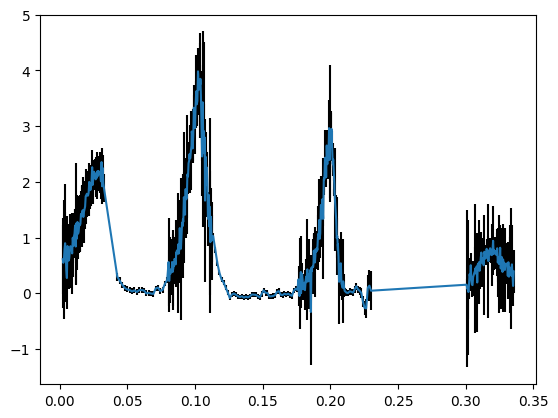

In [19]:
plt.errorbar(np.log10(obs_wlen_inst[obs_argsort]), obs_inst, yerr= yerr_inst, ecolor='black')

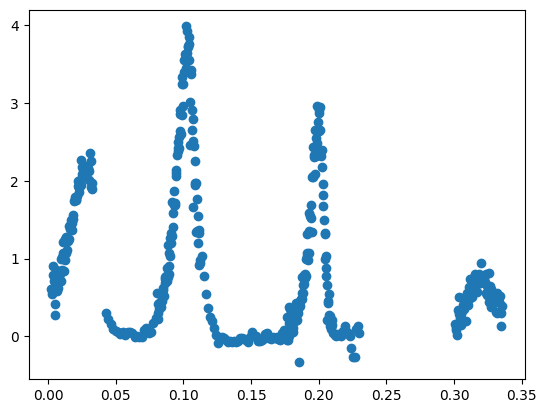

In [20]:
plt.scatter(np.log10(obs_wlen_inst[obs_argsort]), obs_inst)

In [21]:
len(obs_inst)

434

In [12]:
import sys
home = os.environ.get('HOME')
sys.path.insert(0, str(Path(home) / 'WISEJ1738/sbi_ear'))


from code2explore.observations import load_observations

obs_wlen_miri, obs_miri, sigma1828M, \
                obs_wlen_hst, obs_hst, sigma1828H, \
                wlength_hm, \
                x_star_h = load_observations(data = 'WISEJ1828')

obs_wlen_miri, obs_miri, sigmaM, \
    obs_wlen_gemini, obs_gemini, sigmaG, \
    obs_wlen_hst, obs_hst, sigmaH, \
    _, wlength_hm, \
    x_star_g, x_star_h = load_observations()


/home/mvasist/WISEJ1738/sbi_ear/code2explore/observations.py:139: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  obs_hst_pd = pd.read_csv(obsHST_file, delim_whitespace= True, header=1)


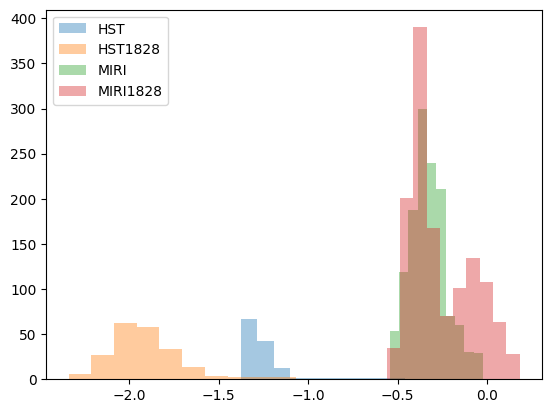

In [15]:
plt.hist(np.log10(sigmaH*1e5), label = 'HST', alpha= 0.4)
plt.hist(np.log10(sigma1828H*1e5), label = 'HST1828', alpha= 0.4)

# plt.hist(np.log10(sigmaG*1e5), label = 'Gemini')
plt.hist(np.log10(sigmaM*1e5), label = 'MIRI', alpha= 0.4)
plt.hist(np.log10(sigma1828M*1e5), label = 'MIRI1828', alpha= 0.4)

plt.legend()
plt.show()

(array([10., 38., 30., 26., 10.,  8.,  2.,  3.,  1.,  1.]),
 array([ 1.49894969,  2.40082369,  3.30269769,  4.20457169,  5.10644569,
         6.00831969,  6.91019369,  7.81206769,  8.71394169,  9.61581569,
        10.51768969]),
 <BarContainer object of 10 artists>)

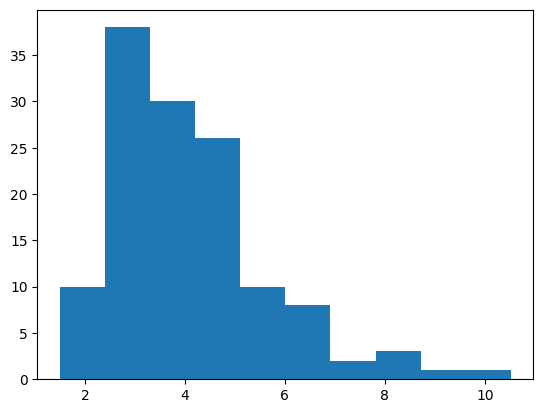

In [20]:
plt.hist(sigmaH/sigma1828H[83:])

In [ ]:
'''
the error bars on 1738 HST data is between 1.5 to 10.5 times that of 1828. 
'''

## 1828

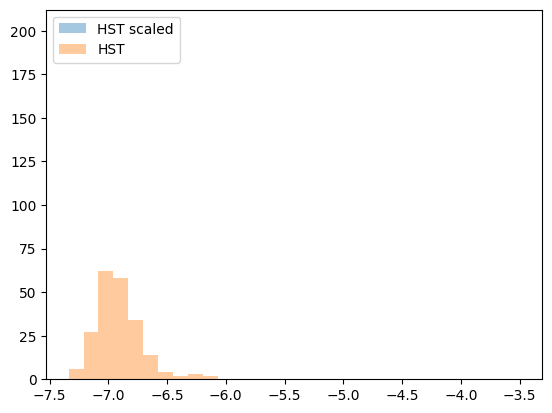

371.7869059940839
371.78690599408367


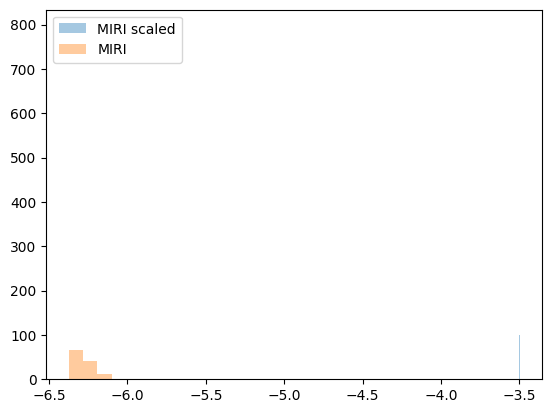

20.89400008661687


In [38]:
## cloudfree

plt.hist(np.log10(np.sqrt(sigma1828H**2+10**-7)), label = 'HST scaled', alpha= 0.4)
plt.hist(np.log10(sigma1828H), label = 'HST', alpha= 0.4)
plt.legend()
plt.show()

print(10**max(np.log10(np.sqrt(sigma1828H**2+10**-7))) / 10**max(np.log10(sigma1828H)))
print(min( np.sqrt(sigma1828H**2+10**-7) / sigma1828H) )


plt.hist(np.log10(np.sqrt(sigma1828M**2+10**-7)), label = 'MIRI scaled', alpha= 0.4)
plt.hist(np.log10(sigmaH), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

print(10**max(np.log10(np.sqrt(sigma1828M**2+10**-7))) / 10**max(np.log10(sigma1828M)))


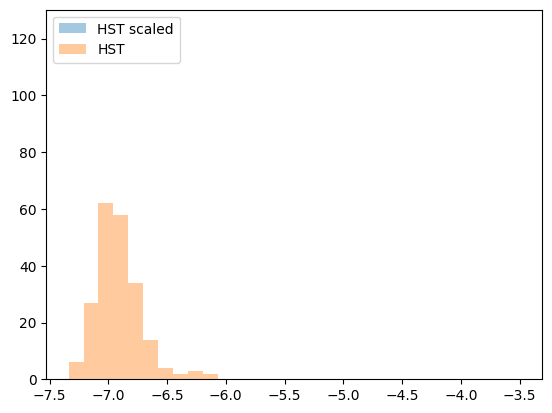

371.8078082853297


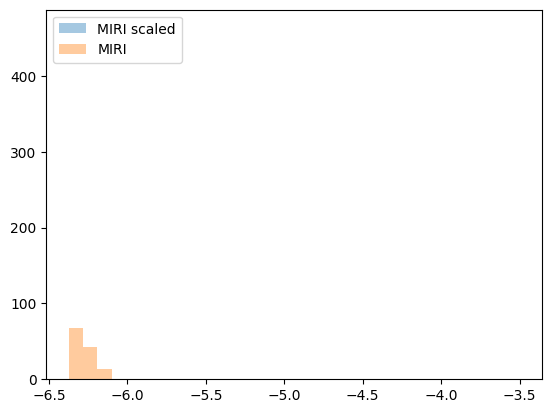

20.879388836210197


In [40]:

## cloudy
plt.hist(np.log10(np.sqrt(sigmaH**2+10**-7)), label = 'HST scaled', alpha= 0.4)
plt.hist(np.log10(sigma1828H), label = 'HST', alpha= 0.4)
plt.legend()
plt.show()

print(10**max(np.log10(np.sqrt(sigmaH**2+10**-7))) / 10**max(np.log10(sigma1828H)))


plt.hist(np.log10(np.sqrt(sigmaM**2+10**-7)), label = 'MIRI scaled', alpha= 0.4)
plt.hist(np.log10(sigmaH), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

print(10**max(np.log10(np.sqrt(sigmaM**2+10**-7))) / 10**max(np.log10(sigma1828M)))


In [28]:
371/91

4.076923076923077

In [36]:
## cloudfree

## hst
print(10**max(np.log10(np.sqrt(sigma1828H**2+10**-13))) / 10**max(np.log10(sigma1828H)))
# print(min( np.sqrt(sigma1828M**2+10**-9) / sigma1828M) )
# print(10**max(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**max(np.log10(sigmaM)))


## miri
print(10**max(np.log10(np.sqrt(sigma1828M**2+10**-9))) / 10**max(np.log10(sigma1828H)))
# print(min( np.sqrt(sigma1828M**2+10**-9) / sigma1828M) )
# print(10**max(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**max(np.log10(sigmaM)))


## cloudy

## hst
print(10**max(np.log10(np.sqrt(sigmaH**2+10**-14.4))) / 10**max(np.log10(sigma1828H)))
# print(min( np.sqrt(sigma1828M**2+10**-9) / sigma1828M) )
# print(10**max(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**max(np.log10(sigmaM)))

## miri
print(10**max(np.log10(np.sqrt(sigmaM**2+10**-9.8))) / 10**max(np.log10(sigma1828M)))
# print(min( np.sqrt(sigma1828M**2+10**-9) / sigma1828M) )
# print(10**max(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**max(np.log10(sigmaM)))





1.0668760487838573
41.22613887786723
4.067964614299704
1.0392080772877887


## 1738

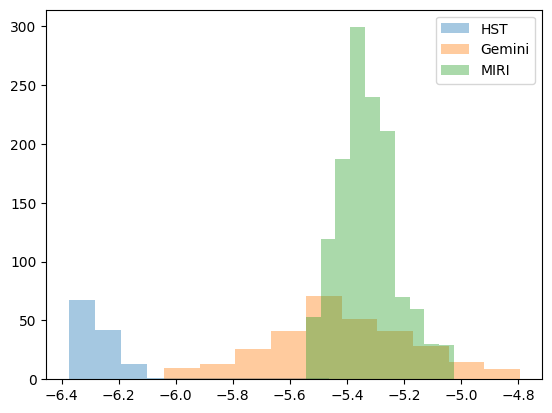

In [16]:
plt.hist(np.log10(sigmaH), label = 'HST', alpha= 0.4)
plt.hist(np.log10(sigmaG), label = 'Gemini', alpha= 0.4)
plt.hist(np.log10(sigmaM), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

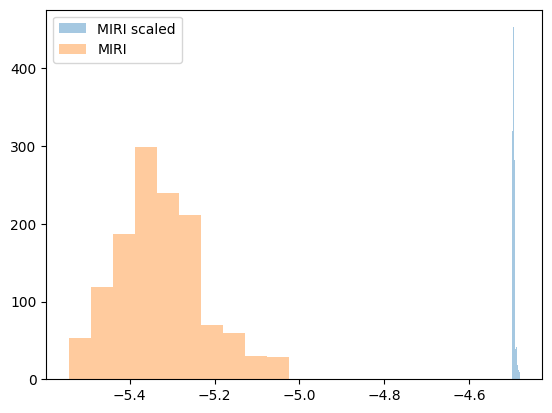

In [10]:
plt.hist(np.log10(np.sqrt(sigmaM**2+10**-9)), label = 'MIRI scaled', alpha= 0.4)
plt.hist(np.log10(sigmaM), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

## HST

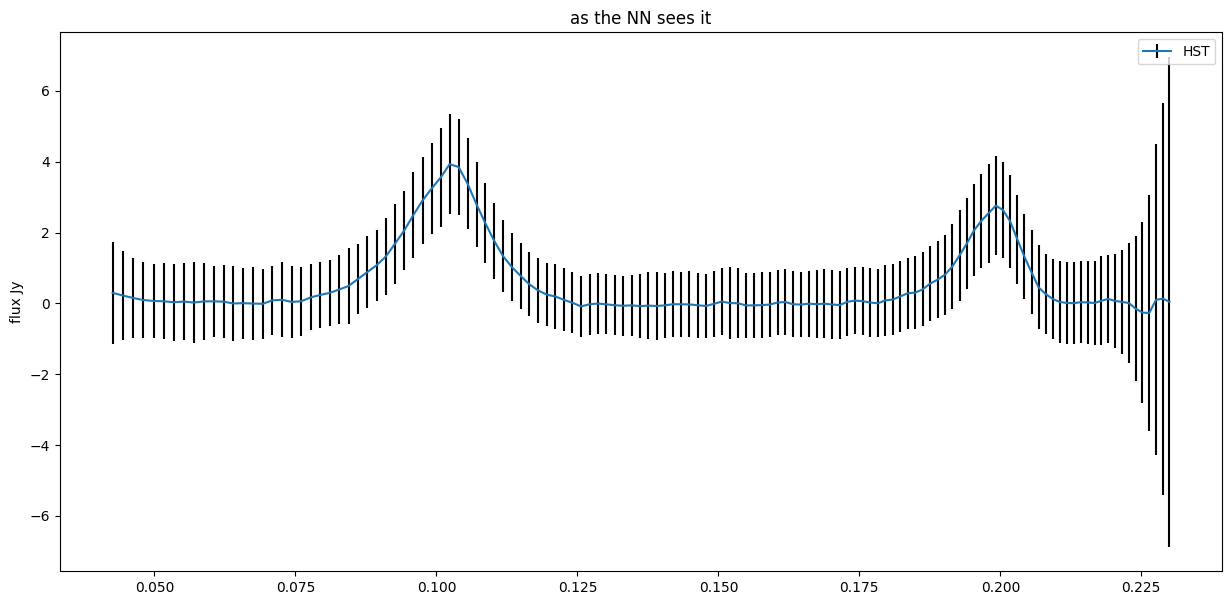

In [4]:
plt.figure(figsize=(15,7))
plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr= 20*sigmaH*1e5, ecolor= 'black', label = 'HST')
# plt.errorbar(np.log10(obs_wlen_gemini), obs_gemini, yerr= sigmaG*1e5, ecolor= 'black', label = 'Gemini')
plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

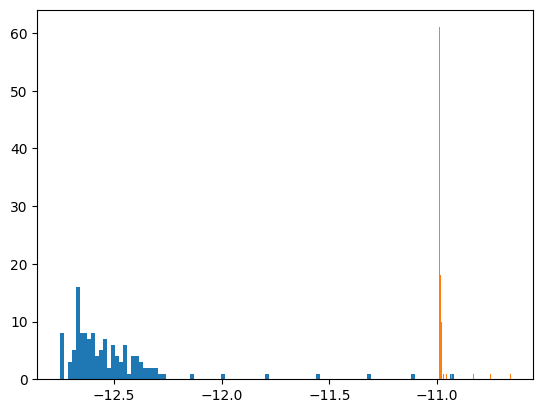

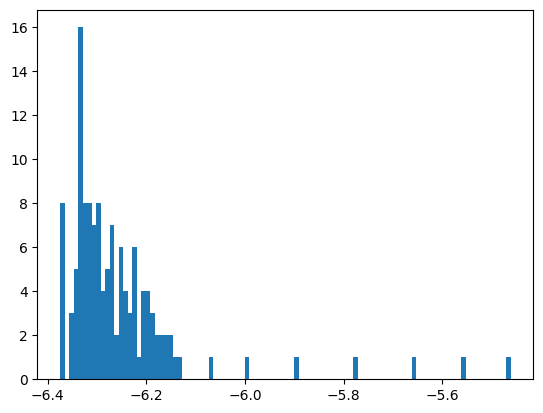

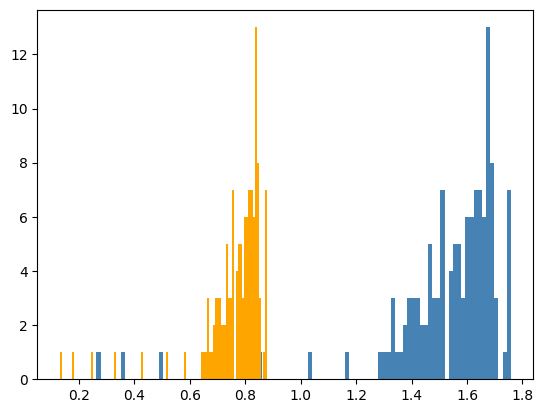

In [5]:
plt.hist(np.log10(sigmaH**2), bins=100)
plt.hist(np.log10(sigmaH**2+1e-11), bins=100 )
plt.show()

plt.hist(np.log10(np.sqrt(sigmaH**2)), bins=100)
plt.show()

plt.hist(np.log10(sigmaH**2+1e-11) - np.log10(sigmaH**2) , bins=100, color='steelblue' )
plt.hist(np.log10(np.sqrt(sigmaH**2+1e-11)) - np.log10(np.sqrt(sigmaH**2)) , bins=100 , color='orange')
plt.show()

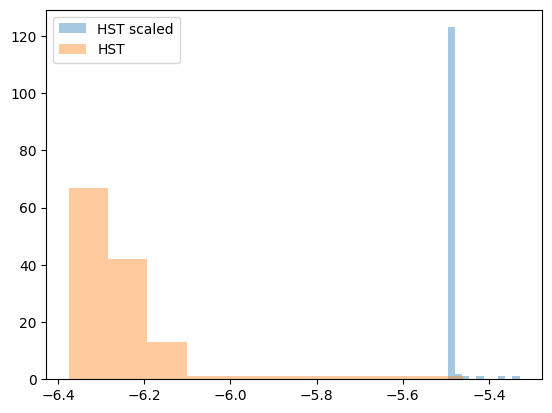

(1.354826630339905, 11.118589743396269)

In [5]:
plt.hist(np.log10(np.sqrt(sigmaH**2+10**-11)), label = 'HST scaled', alpha= 0.4)
plt.hist(np.log10(sigmaH), label = 'HST', alpha= 0.4)
plt.legend()
plt.show()

print(10**max(np.log10(np.sqrt(sigmaH**2+10**-11))) / 10**max(np.log10(sigmaH)))


(array([ 3.,  1.,  1.,  1.,  2., 15., 22., 23., 44., 17.]),
 array([1.35482663, 1.97613926, 2.5974519 , 3.21876453, 3.84007717,
        4.4613898 , 5.08270243, 5.70401507, 6.3253277 , 6.94664033,
        7.56795297]),
 <BarContainer object of 10 artists>)

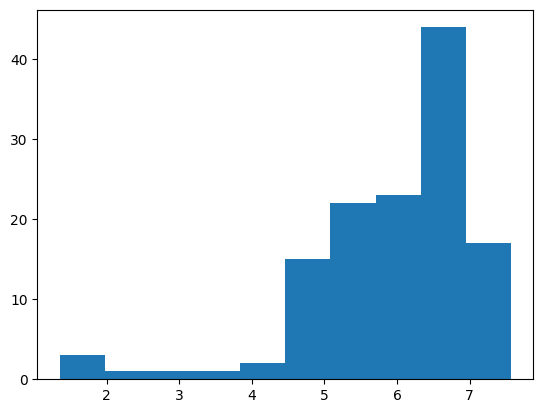

In [11]:
# a = []
# for i in range(len(obs_hst)):
plt.hist(10**np.log10(np.sqrt(sigmaH**2+10**-11)) / 10**(np.log10(sigmaH)))



## Gemini

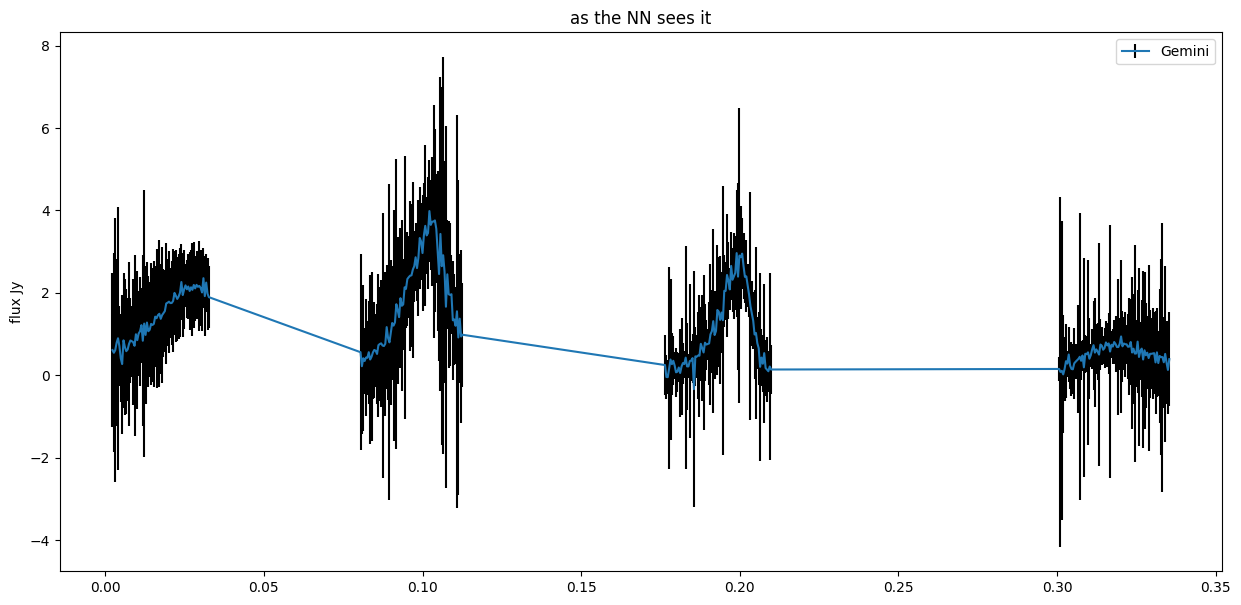

In [32]:
plt.figure(figsize=(15,7))
# plt.errorbar(np.log10(obs_wlen_hst), obs_hst, yerr= sigmaH*1e5, ecolor= 'black', label = 'HST')
# plt.hlines(2*sigmaG*1e5 , 0, 0.35)
plt.errorbar(np.log10(obs_wlen_gemini), obs_gemini, yerr= 3*sigmaG*1e5, ecolor= 'black', label = 'Gemini')

plt.ylabel('flux Jy')
plt.title('as the NN sees it')
plt.legend()
plt.show()

In [12]:
np.log10(8e-13+1e-17)- np.log10(8e-13)

5.428647094518624e-06

In [13]:
np.log10(8e-13+1e-11) - np.log10(8e-13)

1.1303337684950066

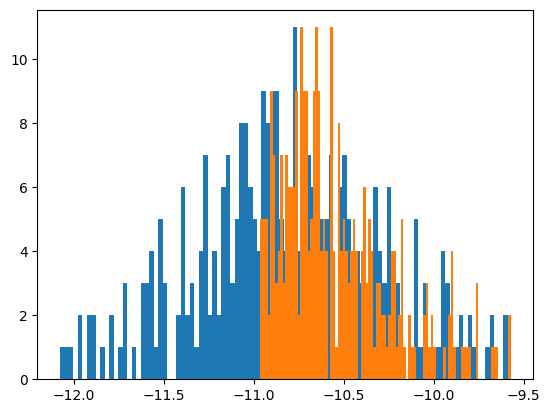

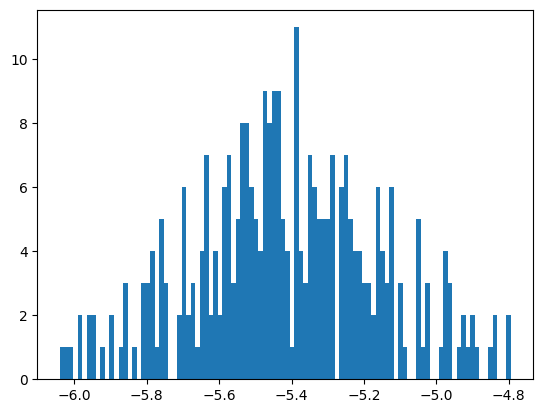

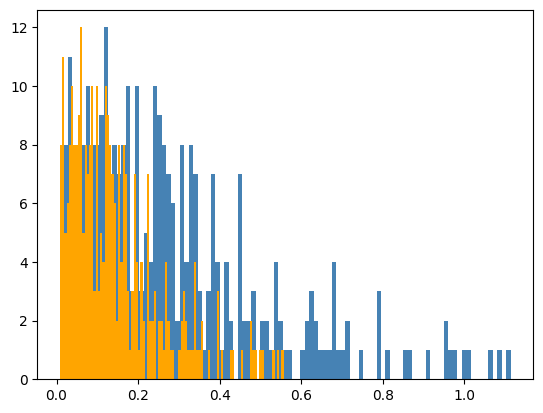

In [6]:
plt.hist(np.log10(sigmaG**2), bins=100)
plt.hist(np.log10(sigmaG**2+1e-11), bins=100 )
plt.show()

plt.hist(np.log10(np.sqrt(sigmaG**2)), bins=100)
plt.show()

plt.hist(np.log10(sigmaG**2+1e-11) - np.log10(sigmaG**2) , bins=100 , color='steelblue')
plt.hist(np.log10(np.sqrt(sigmaG**2+1e-11)) - np.log10(np.sqrt(sigmaG**2)) , bins=100 , color='orange')
plt.show()


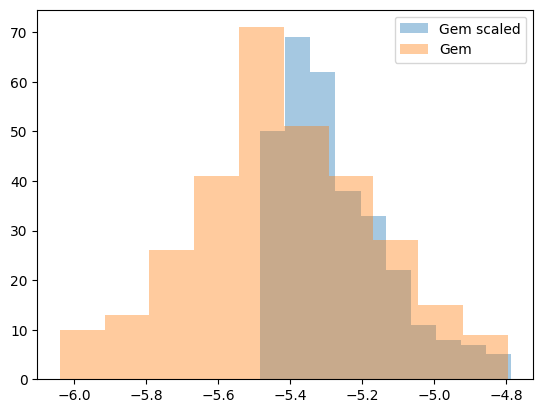

(array([19., 10., 17., 15., 18., 11., 15., 13.,  9., 12.,  8., 12., 13.,
        11.,  6.,  9.,  7.,  9.,  6.,  3.,  7.,  6.,  1.,  5.,  0.,  7.,
         2.,  4.,  1.,  2.,  2.,  1.,  4.,  3.,  1.,  0.,  0.,  0.,  1.,
         4.,  2.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         2.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.01922289, 1.04510222, 1.07098154, 1.09686086, 1.12274019,
        1.14861951, 1.17449884, 1.20037816, 1.22625748, 1.25213681,
        1.27801613, 1.30389545, 1.32977478, 1.3556541 , 1.38153343,
        1.40741275, 1.43329207, 1.4591714 , 1.48505072, 1.51093005,
        1.53680937, 1.56268869, 1.58856802, 1.61444734, 1.64032666,
        1.66620599, 1.69208531, 1.71796464, 1.74384396, 1.76972328,
        1.79560261, 1.8214

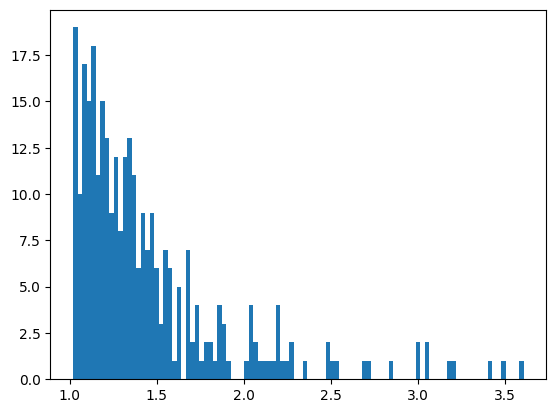

In [14]:
plt.hist(np.log10(np.sqrt(sigmaG**2+10**-11)), label = 'Gem scaled', alpha= 0.4)
plt.hist(np.log10(sigmaG), label = 'Gem', alpha= 0.4)
plt.legend()
plt.show()

10**max(np.log10(np.sqrt(sigmaG**2+10**-11))) / 10**max(np.log10(sigmaG))
plt.hist(10**np.log10(np.sqrt(sigmaG**2+10**-11)) / 10**(np.log10(sigmaG)), bins = 100)


## MIRI

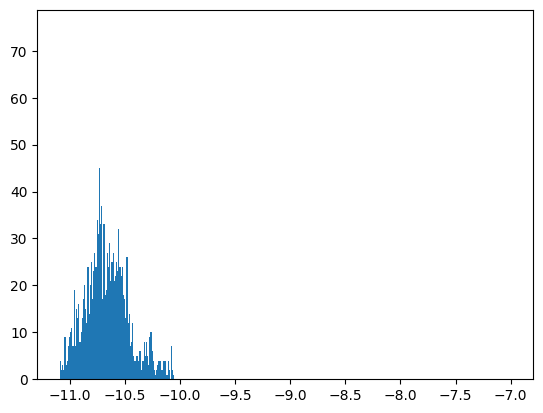

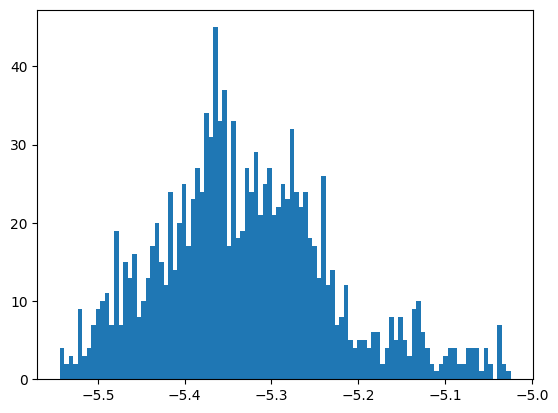

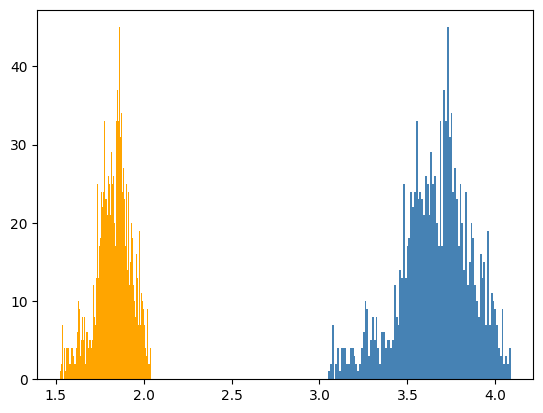

In [7]:
plt.hist(np.log10(sigmaM**2), bins=100)
plt.hist(np.log10(sigmaM**2+1e-7), bins=100 )
plt.show()

plt.hist(np.log10(np.sqrt(sigmaM**2)), bins=100)
plt.show()

plt.hist(np.log10(sigmaM**2+1e-7) - np.log10(sigmaM**2) , bins=100 , color='steelblue')
plt.hist(np.log10(np.sqrt(sigmaM**2+1e-7)) - np.log10(np.sqrt(sigmaM**2)) , bins=100 , color='orange')
plt.show()

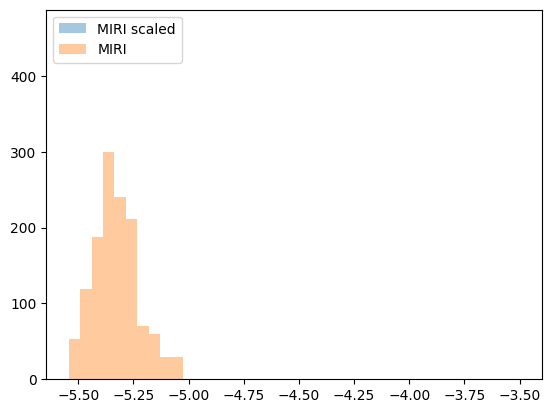

(array([ 48.,  79., 129., 255., 244., 241., 137.,  87.,  55.,  23.]),
 array([ 33.4492836 ,  41.16262452,  48.87596544,  56.58930636,
         64.30264727,  72.01598819,  79.72932911,  87.44267003,
         95.15601095, 102.86935187, 110.58269279]),
 <BarContainer object of 10 artists>)

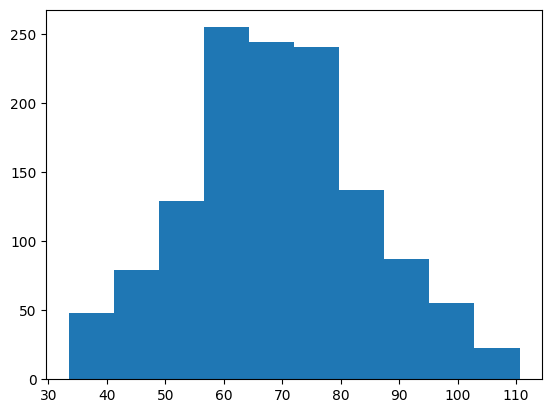

In [16]:
plt.hist(np.log10(np.sqrt(sigmaM**2+10**-7)), label = 'MIRI scaled', alpha= 0.4)
plt.hist(np.log10(sigmaM), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

10**max(np.log10(np.sqrt(sigmaM**2+10**-7))) / 10**max(np.log10(sigmaM))

plt.hist(10**np.log10(np.sqrt(sigmaM**2+10**-7)) / 10**(np.log10(sigmaM)))


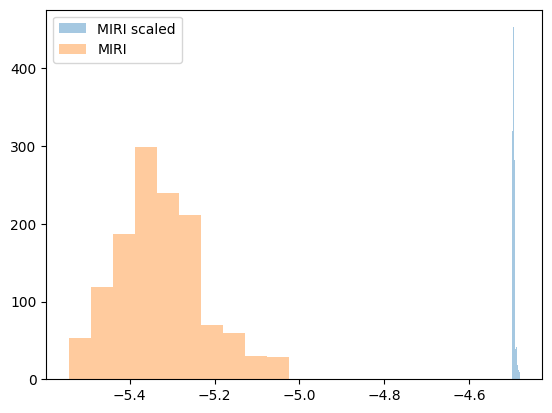

(array([ 49.,  82., 134., 255., 242., 241., 131.,  88.,  53.,  23.]),
 array([ 3.48977732,  4.25109378,  5.01241024,  5.7737267 ,  6.53504316,
         7.29635962,  8.05767608,  8.81899254,  9.58030901, 10.34162547,
        11.10294193]),
 <BarContainer object of 10 artists>)

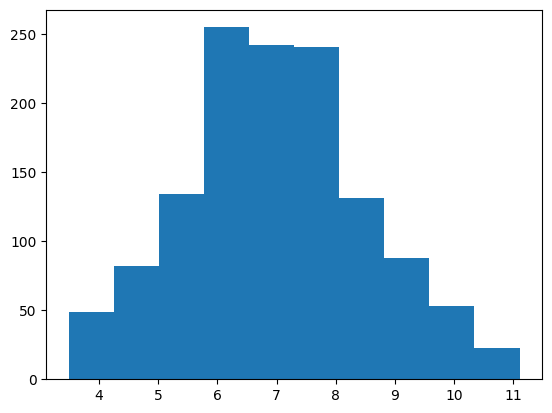

In [20]:
plt.hist(np.log10(np.sqrt(sigmaM**2+10**-9)), label = 'MIRI scaled', alpha= 0.4)
plt.hist(np.log10(sigmaM), label = 'MIRI', alpha= 0.4)
plt.legend()
plt.show()

10**max(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**max(np.log10(sigmaM)), \
10**min(np.log10(np.sqrt(sigmaM**2+10**-9))) / 10**min(np.log10(sigmaM))

plt.hist(10**np.log10(np.sqrt(sigmaM**2+10**-9)) / 10**(np.log10(sigmaM)))


## MIRI

In [23]:
## noise as a fraction of the flux



(array([ 27.,  22.,  46.,  36.,  41.,  93., 134., 121., 117., 125., 148.,
         93.,  71.,  60.,  44.,  44.,  32.,  21.,  15.,   8.]),
 array([ 2.48977732,  2.87043555,  3.25109378,  3.63175201,  4.01241024,
         4.39306847,  4.7737267 ,  5.15438493,  5.53504316,  5.91570139,
         6.29635962,  6.67701785,  7.05767608,  7.43833431,  7.81899254,
         8.19965078,  8.58030901,  8.96096724,  9.34162547,  9.7222837 ,
        10.10294193]),
 <BarContainer object of 20 artists>)

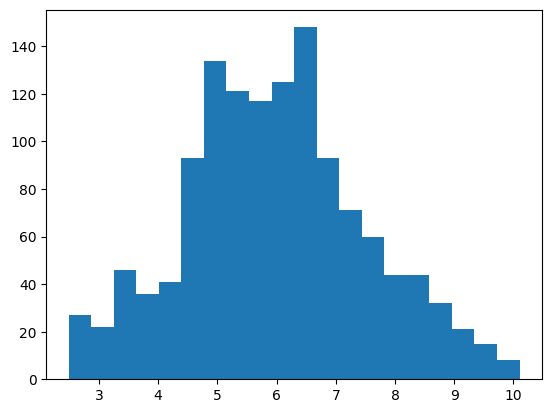

In [24]:
## 50-225% - old
## 300-1000%
plt.hist( (np.sqrt(sigmaM**2+10**-9) - sigmaM )/ sigmaM , bins = 20) 
# plt.show()

(array([ 1.,  4.,  5.,  0.,  3.,  3.,  1.,  5.,  5.,  3.,  2.,  5.,  4.,
         2.,  3.,  1.,  2.,  3.,  6.,  9.,  9.,  4.,  6.,  7.,  5.,  8.,
         4.,  3.,  5.,  7.,  2.,  7.,  5.,  4.,  5., 11.,  8.,  8., 13.,
        12., 27., 10., 18., 18., 24., 22., 23., 31., 26., 25., 20., 22.,
        27., 22., 23., 24., 28., 27., 18., 20., 26., 24., 33., 32., 33.,
        44., 30., 31., 18., 26., 23., 21., 16., 21., 23., 11., 11., 20.,
        19., 17., 11.,  6., 10., 19., 12., 11., 11., 15., 10.,  7., 12.,
         8.,  7.,  2.,  7.,  6.,  3.,  1.,  2.,  4.]),
 array([0.54279772, 0.54782412, 0.55285052, 0.55787693, 0.56290333,
        0.56792973, 0.57295614, 0.57798254, 0.58300894, 0.58803535,
        0.59306175, 0.59808815, 0.60311456, 0.60814096, 0.61316737,
        0.61819377, 0.62322017, 0.62824658, 0.63327298, 0.63829938,
        0.64332579, 0.64835219, 0.65337859, 0.658405  , 0.6634314 ,
        0.6684578 , 0.67348421, 0.67851061, 0.68353701, 0.68856342,
        0.69358982, 0.6986

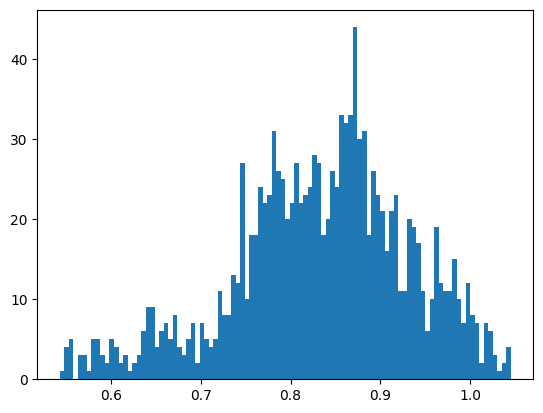

In [25]:
plt.hist( np.log10(np.sqrt(sigmaM**2+10**-9)*1e5) - np.log10(np.sqrt(sigmaM**2)*1e5 ), bins=100)

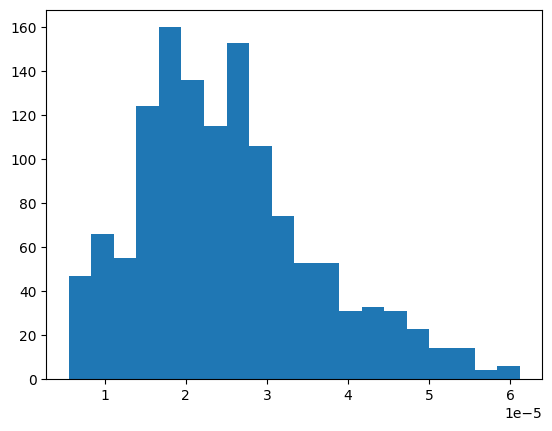

(array([10.,  7., 14., 10.,  6., 11., 20., 12., 15.,  8., 12.,  8.,  8.,
        13., 14., 18., 22., 29., 27., 28., 30., 32., 37., 34., 27., 26.,
        31., 24., 27., 28., 29., 18., 20., 25., 23., 26., 33., 29., 38.,
        27., 28., 24., 14., 22., 18., 14., 19.,  9., 20., 12., 17.,  9.,
        10.,  6., 11., 14.,  9., 13.,  9.,  8.,  6.,  2.,  6.,  6., 11.,
        10.,  3.,  9.,  7.,  4.,  6., 14.,  2.,  4.,  5.,  8.,  1.,  6.,
         4.,  4.,  5.,  5.,  1.,  3.,  0.,  1.,  1.,  6.,  5.,  1.,  1.,
         0.,  3.,  0.,  0.,  0.,  1.,  1.,  1.,  3.]),
 array([2.42737680e-06, 2.66860428e-06, 2.90983176e-06, 3.15105924e-06,
        3.39228673e-06, 3.63351421e-06, 3.87474169e-06, 4.11596918e-06,
        4.35719666e-06, 4.59842414e-06, 4.83965162e-06, 5.08087911e-06,
        5.32210659e-06, 5.56333407e-06, 5.80456156e-06, 6.04578904e-06,
        6.28701652e-06, 6.52824400e-06, 6.76947149e-06, 7.01069897e-06,
        7.25192645e-06, 7.49315393e-06, 7.73438142e-06, 7.97560890e-06,
  

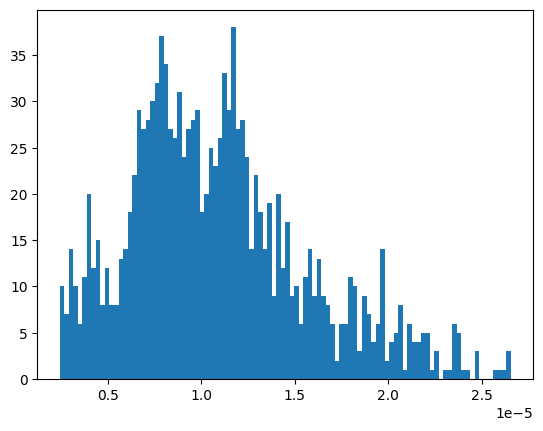

In [26]:
plt.hist( (np.sqrt(sigmaM**2+10**-15) - sigmaM )/ sigmaM , bins = 20) 
plt.show()

plt.hist( np.log10(np.sqrt(sigmaM**2+10**-15)*1e5) - np.log10(np.sqrt(sigmaM**2)*1e5 ), bins=100)

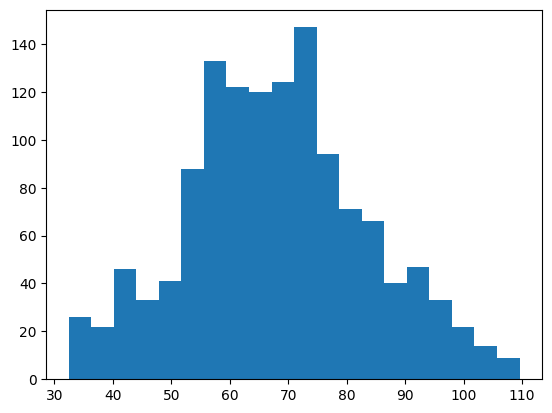

In [27]:
plt.hist( (np.sqrt(sigmaM**2+10**-7) - sigmaM )/ sigmaM , bins = 20) 
plt.show()

(array([ 1.,  2.,  7.,  0.,  2.,  4.,  1.,  4.,  4.,  4.,  2.,  2.,  4.,
         4.,  3.,  2.,  1.,  2.,  4.,  6., 10.,  9.,  3.,  5.,  8.,  5.,
         8.,  4.,  2.,  6.,  6.,  4.,  5.,  5.,  4.,  5., 12.,  8.,  7.,
        14., 13., 25., 13., 17., 18., 24., 22., 24., 33., 23., 24., 23.,
        21., 26., 25., 21., 29., 25., 26., 20., 17., 33., 17., 37., 33.,
        45., 31., 34., 24., 27., 23., 17., 25., 20., 14., 24., 12., 15.,
        20., 18., 12., 10.,  8., 16., 13., 15.,  7., 19.,  7., 11., 10.,
         9.,  7.,  4.,  3.,  9.,  2.,  3.,  2.,  4.]),
 array([1.52438682, 1.52957982, 1.53477283, 1.53996583, 1.54515883,
        1.55035184, 1.55554484, 1.56073784, 1.56593085, 1.57112385,
        1.57631685, 1.58150986, 1.58670286, 1.59189586, 1.59708887,
        1.60228187, 1.60747488, 1.61266788, 1.61786088, 1.62305389,
        1.62824689, 1.63343989, 1.6386329 , 1.6438259 , 1.6490189 ,
        1.65421191, 1.65940491, 1.66459791, 1.66979092, 1.67498392,
        1.68017692, 1.6853

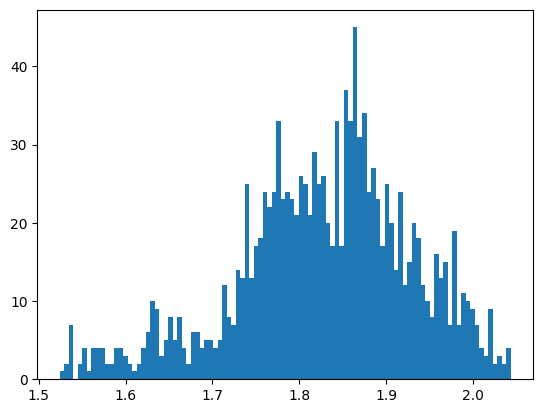

In [28]:
plt.hist( np.log10(np.sqrt(sigmaM**2+10**-7)*1e5) - np.log10(np.sqrt(sigmaM**2)*1e5 ), bins=100)

## HST

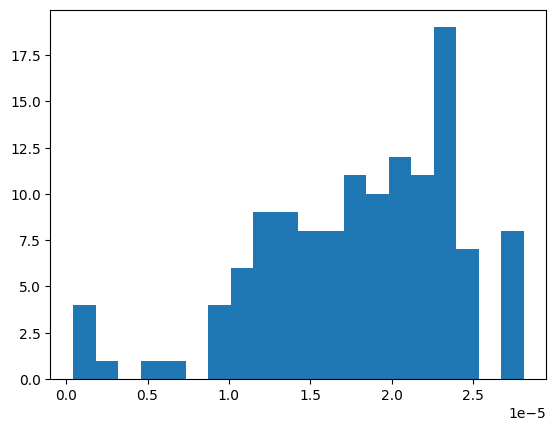

(array([2., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        2., 2., 0., 1., 1., 2., 1., 2., 3., 0., 3., 2., 0., 0., 3., 4., 0.,
        3., 1., 1., 3., 3., 2., 0., 1., 2., 4., 2., 0., 4., 1., 1., 0., 3.,
        2., 4., 2., 2., 3., 2., 3., 1., 3., 3., 3., 1., 3., 3., 4., 8., 1.,
        3., 1., 0., 1., 2., 0., 0., 0., 0., 0., 0., 3., 1., 1., 3.]),
 array([1.81438430e-07, 3.01817855e-07, 4.22197280e-07, 5.42576705e-07,
        6.62956131e-07, 7.83335556e-07, 9.03714981e-07, 1.02409441e-06,
        1.14447383e-06, 1.26485326e-06, 1.38523268e-06, 1.50561211e-06,
        1.62599153e-06, 1.74637096e-06, 1.86675038e-06, 1.98712981e-06,
        2.10750923e-06, 2.22788866e-06, 2.34826808e-06, 2.46864751e-06,
        2.58902693e-06, 2.70940636e-06, 2.82978578e-06, 2.95016521e-06,
        3.07054463e-06, 3.19092406e-06, 3.31130348e-06, 3.43168291e-06,
        3.55206233e-06, 3.67244176e-06, 3.7928

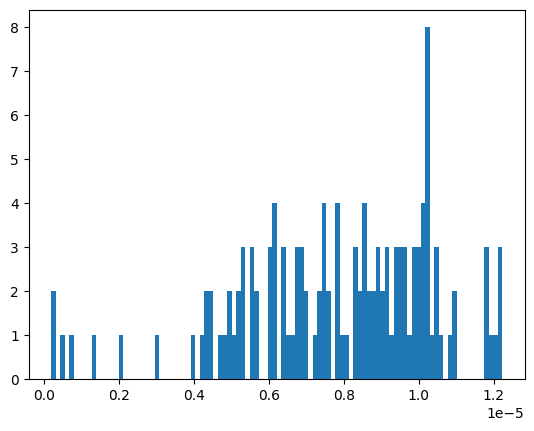

In [29]:
plt.hist( (np.sqrt(sigmaH**2+10**-17) - sigmaH )/ sigmaH, bins = 20, alpha = 1 )
plt.show()

plt.hist( np.log10(np.sqrt(sigmaH**2+10**-17)*1e5) - np.log10(np.sqrt(sigmaH**2)*1e5 ), bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  1.,  3.,  1.,  1.,  2.,  3.,  3.,  3.,
         2.,  2.,  5.,  3.,  3.,  7.,  0.,  4.,  5.,  5.,  3.,  6.,  6.,
         7.,  7.,  6., 13.,  8.,  3.,  0.,  1.,  7.]),
 array([0.13188372, 0.13935467, 0.14682562, 0.15429657, 0.16176751,
        0.16923846, 0.17670941, 0.18418035, 0.1916513 , 0.19912225,
        0.20659319, 0.21406414, 0.22153509, 0.22900604, 0.23647698,
        0.24394793, 0.25141888, 0.25888982, 0.26636077, 0.27383172,
        0.28130266, 0.28877361, 0.29624456, 0.30371551, 0.31118645,
        0.3186574 , 0.32612835, 0.33359929, 0.34107024, 0.34854119,
        0.35601213, 0.3634

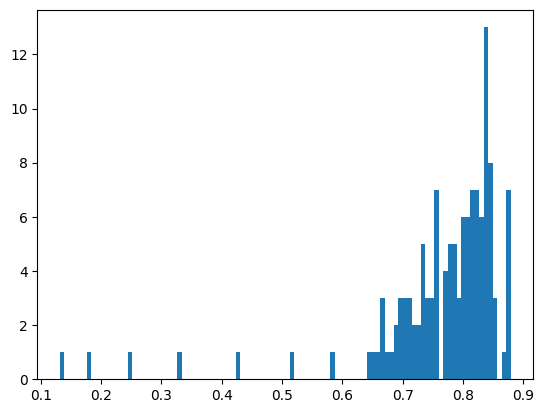

In [30]:
 plt.hist( np.log10(np.sqrt(sigmaH**2+10**-11)*1e5) - np.log10(np.sqrt(sigmaH**2)*1e5 ), bins=100)

(array([ 2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  6.,  9.,  9.,
        13., 12., 11., 17., 27.,  9.,  8.]),
 array([0.35482663, 0.66548295, 0.97613926, 1.28679558, 1.5974519 ,
        1.90810821, 2.21876453, 2.52942085, 2.84007717, 3.15073348,
        3.4613898 , 3.77204612, 4.08270243, 4.39335875, 4.70401507,
        5.01467138, 5.3253277 , 5.63598402, 5.94664033, 6.25729665,
        6.56795297]),
 <BarContainer object of 20 artists>)

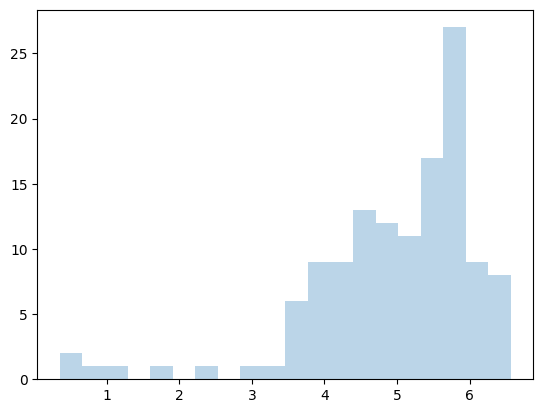

In [31]:
plt.hist( (np.sqrt(sigmaH**2+10**-11) - sigmaH )/ sigmaH, bins = 20, alpha = 0.3 )
# 600 %

## Gem

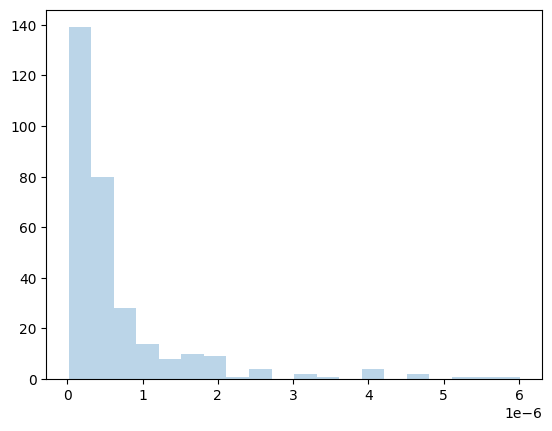

(array([32., 32., 32., 27., 16., 16., 23., 11., 14., 16.,  4., 10.,  4.,
         5.,  5.,  4.,  5.,  1.,  3.,  1.,  6.,  1.,  1.,  0.,  0.,  1.,
         5.,  2.,  1.,  1.,  1.,  4.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.42863640e-09, 3.44269844e-08, 6.04253324e-08, 8.64236804e-08,
        1.12422028e-07, 1.38420376e-07, 1.64418724e-07, 1.90417072e-07,
        2.16415421e-07, 2.42413769e-07, 2.68412117e-07, 2.94410465e-07,
        3.20408813e-07, 3.46407161e-07, 3.72405509e-07, 3.98403857e-07,
        4.24402205e-07, 4.50400553e-07, 4.76398901e-07, 5.02397249e-07,
        5.28395597e-07, 5.54393945e-07, 5.80392293e-07, 6.06390641e-07,
  

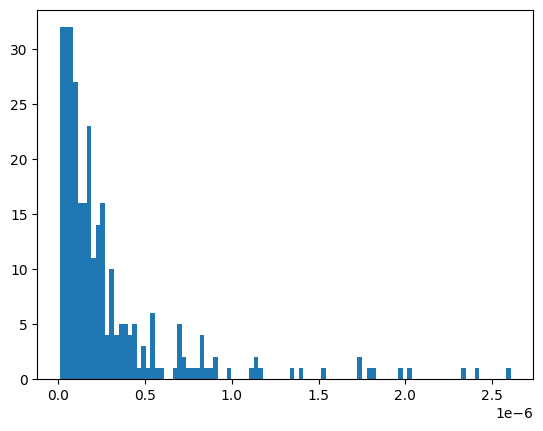

In [32]:
plt.hist( (np.sqrt(sigmaG**2+10**-17) - sigmaG )/ sigmaG, bins = 20, alpha = 0.3 )
plt.show()
#0%

plt.hist( np.log10(np.sqrt(sigmaG**2+10**-17)*1e5) - np.log10(np.sqrt(sigmaG**2)*1e5 ), bins=100)


(array([4., 1., 3., 3., 1., 7., 1., 1., 3., 4., 1., 0., 2., 2., 1., 6., 2.,
        4., 4., 3., 1., 2., 2., 3., 2., 1., 4., 5., 1., 5., 2., 4., 1., 0.,
        3., 1., 4., 2., 3., 3., 0., 3., 1., 3., 2., 3., 1., 3., 3., 3., 0.,
        1., 2., 0., 4., 4., 3., 1., 0., 0., 1., 2., 1., 1., 1., 2., 1., 0.,
        3., 1., 3., 4., 1., 1., 5., 1., 2., 3., 1., 2., 1., 5., 0., 2., 1.,
        0., 2., 2., 0., 1., 0., 1., 0., 5., 3., 0., 1., 0., 3., 0., 1., 2.,
        2., 1., 2., 1., 1., 2., 3., 2., 0., 1., 0., 0., 0., 0., 0., 1., 2.,
        0., 1., 0., 0., 1., 4., 1., 1., 2., 1., 0., 0., 2., 0., 0., 0., 0.,
        1., 0., 3., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 3.,
        0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 2., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 3., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

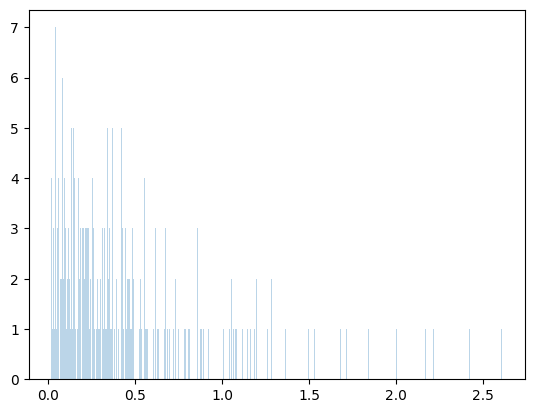

In [43]:
plt.hist( (np.sqrt(sigmaG**2+10**-11) - sigmaG )/ sigmaG, bins = 600, alpha = 0.3 )
# plt.show()
#100 %



(array([ 8., 11.,  5.,  6.,  8., 10.,  8.,  8.,  9., 12.,  5.,  8.,  7.,
         8., 10.,  3., 10.,  3.,  5.,  4., 10.,  9.,  8.,  7.,  6.,  2.,
         8.,  4.,  8.,  7.,  3.,  1.,  3.,  7.,  4.,  1.,  4.,  2.,  0.,
         7.,  2.,  2.,  3.,  0.,  2.,  2.,  1.,  4.,  2.,  1.,  1.,  0.,
         0.,  1.,  2.,  3.,  2.,  1.,  1.,  1.,  4.,  1.,  1.,  2.,  0.,
         0.,  1.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([0.00826917, 0.01375813, 0.01924708, 0.02473604, 0.030225  ,
        0.03571395, 0.04120291, 0.04669187, 0.05218082, 0.05766978,
        0.06315874, 0.06864769, 0.07413665, 0.07962561, 0.08511456,
        0.09060352, 0.09609248, 0.10158143, 0.10707039, 0.11255935,
        0.1180483 , 0.12353726, 0.12902622, 0.13451517, 0.14000413,
        0.14549309, 0.15098204, 0.156471  , 0.16195996, 0.16744891,
        0.17293787, 0.1784

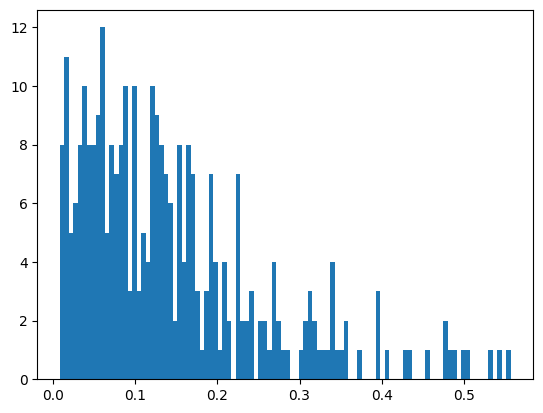

In [3]:
plt.hist( np.log10(np.sqrt(sigmaG**2+10**-11)*1e5) - np.log10(np.sqrt(sigmaG**2)*1e5 ), bins=100)

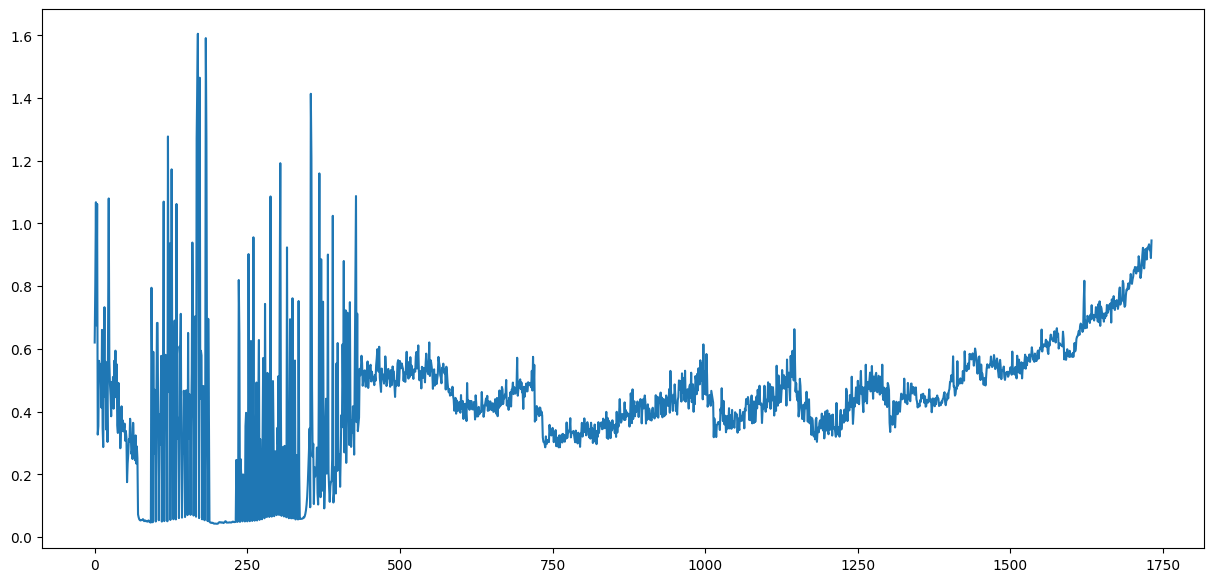

(0.04215474300317012, 1.6050866968229405)

In [44]:
obs_wlen_inst = np.append(obs_wlen_hst, obs_wlen_gemini)
index_argsort = np.argsort(obs_wlen_inst)

obs_inst_app = np.append(obs_hst, obs_gemini)
obs_inst = obs_inst_app[index_argsort]
x_star_hg = np.append(obs_inst, obs_miri)

plt.figure(figsize=(15,7))
sigma_inst = np.append(sigmaH, sigmaG)[index_argsort]
s = np.append(sigma_inst, sigmaM)
plt.plot(s*1e5)
plt.show()

np.min(s*1e5), np.max(s*1e5)


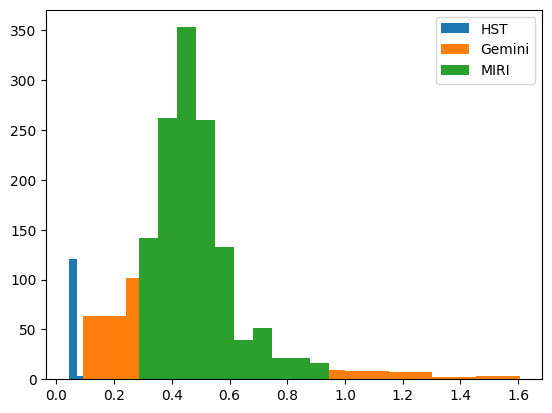

In [45]:
plt.hist(sigmaH*1e5, label = 'HST')
plt.hist(sigmaG*1e5, label = 'Gemini')
plt.hist(sigmaM*1e5, label = 'MIRI')
plt.legend()
plt.show()

(array([ 63., 102.,  55.,  39.,  17.,   9.,   8.,   7.,   2.,   3.]),
 array([0.09124312, 0.24262748, 0.39401184, 0.54539619, 0.69678055,
        0.84816491, 0.99954927, 1.15093362, 1.30231798, 1.45370234,
        1.6050867 ]),
 <BarContainer object of 10 artists>)

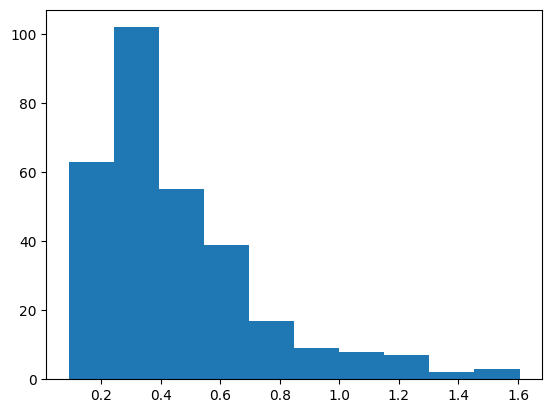

In [49]:
plt.hist(sigmaG*1e5, label = 'MIRI')


(array([121.,   3.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([0.04215474, 0.0725342 , 0.10291365, 0.1332931 , 0.16367256,
        0.19405201, 0.22443146, 0.25481092, 0.28519037, 0.31556982,
        0.34594928]),
 <BarContainer object of 10 artists>)

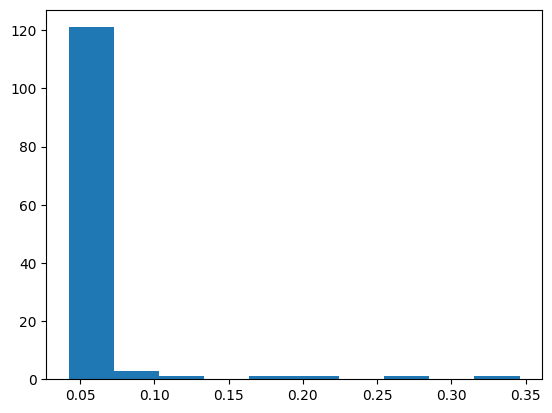

In [46]:
plt.hist(sigmaH*1e5, label = 'HST')


(array([142., 262., 353., 260., 133.,  39.,  51.,  21.,  21.,  16.]),
 array([0.28597666, 0.35196075, 0.41794483, 0.48392892, 0.549913  ,
        0.61589708, 0.68188117, 0.74786525, 0.81384933, 0.87983342,
        0.9458175 ]),
 <BarContainer object of 10 artists>)

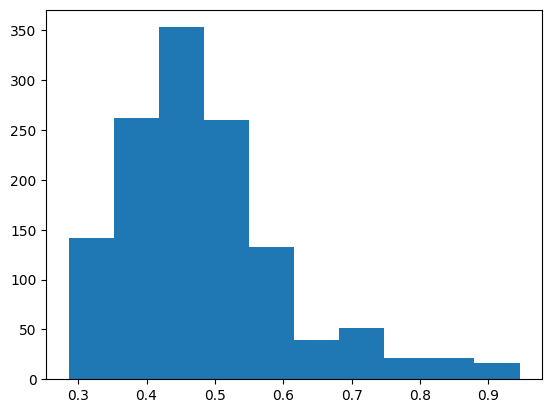

In [47]:
plt.hist(sigmaM*1e5, label = 'HST')


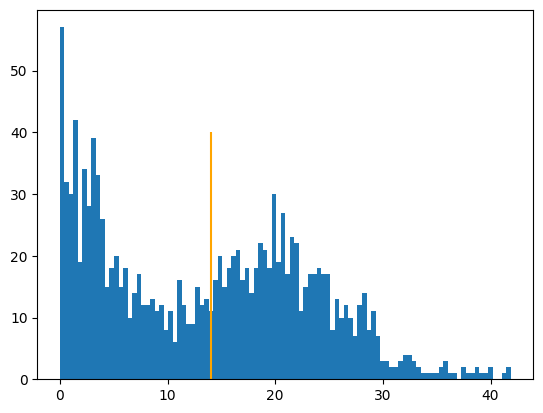

In [38]:
plt.hist(obs_miri, bins=100)
# plt.hist(sigmaM*1e5, label = 'MIRI', bins=100)
plt.vlines(14, 0, 40, color='orange')

(array([ 2.,  0.,  1.,  0.,  6., 18., 16., 20., 10.,  4.,  2.,  3.,  3.,
         4.,  0.,  3.,  0.,  1.,  1.,  2.,  0.,  0.,  2.,  0.,  1.,  1.,
         0.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.27212907, -0.23008974, -0.18805041, -0.14601107, -0.10397174,
        -0.06193241, -0.01989308,  0.02214626,  0.06418559,  0.10622492,
         0.14826425,  0.19030358,  0.23234292,  0.27438225,  0.31642158,
         0.35846091,  0.40050025,  0.44253958,  0.48457891,  0.52661824,
         0.56865757,  0.61069691,  0.65273624,  0.69477557,  0.7368149 ,
         0.77885424,  0.82089357,  0.8629329 ,  0.90497223,  0.947011

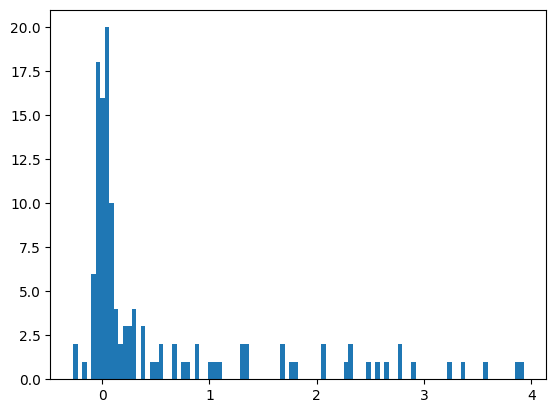

In [39]:
plt.hist(obs_hst, bins=100)
# plt.vlines(0.06, 0, 30, color = 'red')
# plt.hist(sigmaH*1e5, label = 'MIRI', bins=100)
# plt.show()


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  4.,  4.,  7.,  8.,
         3.,  9.,  8.,  7., 10., 10., 11., 14.,  8.,  8.,  8., 10., 16.,
         9.,  4.,  2.,  3.,  6.,  3.,  4.,  1.,  1.,  3.,  4.,  3.,  5.,
         4.,  2.,  2.,  3.,  4.,  2.,  0.,  3.,  2.,  4.,  2.,  1.,  2.,
         5.,  4.,  3.,  5.,  5.,  5.,  4.,  1.,  1.,  3.,  2.,  6.,  3.,
         2.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,  1.,  2.,  2.,  3.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  2.,  0.,  0.,  1.,
         1.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.33655493, -0.29334668, -0.25013843, -0.20693018, -0.16372193,
        -0.12051368, -0.07730543, -0.03409718,  0.00911107,  0.05231932,
         0.09552757,  0.13873582,  0.18194407,  0.22515232,  0.26836057,
         0.31156882,  0.35477707,  0.39798532,  0.44119356,  0.48440181,
         0.52761006,  0.57081831,  0.61402656,  0.65723481,  0.70044306,
         0.74365131,  0.78685956,  0.83006781,  0.87327606,  0.916484

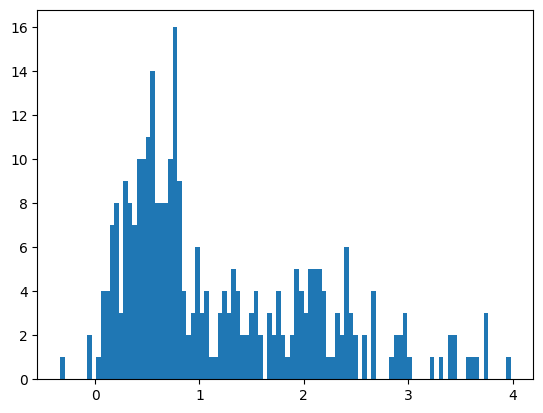

In [40]:
plt.hist(obs_gemini, bins=100)
# plt.vlines(0.32, 0, 30, color = 'red')
# plt.vlines(0.65, 0, 30, color = 'red')

# plt.hist(sigmaG*1e5, label = 'Gem', bins=100)
# plt.show()

In [41]:
## MIRI is almost 10-20 times noisier than HST
## MIRI is almost 2-5 times noisier than Gemini
## Gemini is around 4 times noisier than HST

In [42]:
# 3/1.6, 1/0.2
# 1/0.05, 3/0.35
# 0.2/0.05, 1.6/0.35

## Old code 

In [33]:
sigmaM

array([1.36444132e-05, 1.32612375e-05, 1.39046492e-05, ...,
       2.99281909e-05, 2.89097603e-05, 2.89871055e-05])

In [25]:
min(sigmaM)**2, max(sigmaM)**2 

(9.805679521796488e-11, 9.403748032002044e-10)

In [34]:
np.sqrt(min(sigmaM)**2+10**-9)/ min(sigmaM), np.sqrt(max(sigmaM)**2+10**-9)/max(sigmaM)

(3.3463668886450257, 1.4364559787342812)

In [35]:
## the new sigma is 234% and 43% more noisy than the old noise. but it makes more sense to give these
## values in terms of percentages of the measured flux than the measured noise. see plotting_obs.ipynb. 

In [22]:
np.where(sigmaM**2 == max(sigmaM**2)), np.where(sigmaM**2 == min(sigmaM**2))

((array([1289]),), (array([746]),))

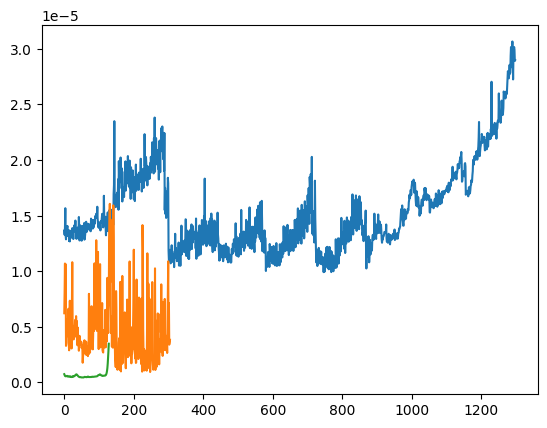

In [24]:
plt.plot(sigmaM)
plt.plot(sigmaG)
plt.plot(sigmaH)

In [ ]:
max(sigmaH* 1e5), min(sigmaH*1e5)
max(sigmaG* 1e5), min(sigmaG*1e5)


In [196]:
## Gem

sf = (obs_gemini > 0.009) & (obs_gemini< 2.64)
print(np.where(sigmaG[sf]/(obs_gemini*1e-5)[sf] == min(sigmaG[sf]/(obs_gemini*1e-5)[sf])), np.where(sigmaG[sf]/(obs_gemini*1e-5)[sf] == max(sigmaG[sf]/(obs_gemini*1e-5)[sf])))
print(sigmaG[sf][177], (obs_gemini*1e-5)[sf][177] ,sigmaG[sf][198], (obs_gemini*1e-5)[sf][198] )
## the percentage of flux variation (in units of measured flux) due to the quoted noise is % 
print(sigmaG[sf][177]*1e5,(obs_gemini[sf])[177] , sigmaG[sf][198]*1e5, (obs_gemini[sf])[198])


## the error on the flux measurement when 10**-17 is added is %. thtas an increase of nothing %

print(np.sqrt(sigmaG[sf][177]**2+ 10**-17)/ (obs_gemini[sf][177]*1e-5)) , 
print(np.sqrt(sigmaG[sf][198]**2+ 10**-17)/(obs_gemini[sf][198]*1e-5))

## in units of old noise
print(np.sqrt(sigmaG[sf][177]**2+ 10**-17)/ (sigmaG[sf][177])) , 
print(np.sqrt(sigmaG[sf][198]**2+ 10**-17)/(sigmaG[sf][198]))


## the error on the flux measurement when 10**-11 is added is %. thtas an increase of 123-6k %

print(np.sqrt(sigmaG[sf][177]**2+ 10**-11)/ (obs_gemini[sf][177]*1e-5))  , 
print(np.sqrt(sigmaG[sf][198]**2+ 10**-11)/(obs_gemini[sf][198]*1e-5))

## in units of old noise
print(np.sqrt(sigmaG[sf][177]**2+ 10**-11)/ (sigmaG[sf][177])) , 
print(np.sqrt(sigmaG[sf][198]**2+ 10**-11)/(sigmaG[sf][198]))



(array([177]),) (array([198]),)
1.729092027221096e-06 2.182848505727589e-05 4.779000543572094e-06 2.1981186092581575e-07
0.1729092027221096 2.1828485057275886 0.4779000543572094 0.021981186092581574
0.07921277699175094
21.741327195390554
1.0000016723740677
1.000000218925221
0.165111360139219
26.070107489183517
2.08440661390233
1.1991040363954768


In [209]:
## HST 

sf = (obs_hst > 0.022) & (obs_hst< 0.35)
print(np.where(sigmaH[sf]/(obs_hst*1e-5)[sf] == min(sigmaH[sf]/(obs_hst*1e-5)[sf])), np.where(sigmaH[sf]/(obs_hst*1e-5)[sf] == max(sigmaH[sf]/(obs_hst*1e-5)[sf])))
print(sigmaH[sf][18]/(obs_hst[sf]*1e-5)[18] , sigmaH[sf][45]/(obs_hst[sf]*1e-5)[45])
## the percentage of flux variation (in units of measured flux) due to the quoted noise is 4.1% - 360% 
print(sigmaH[sf][18]*1e5,(obs_hst[sf])[18] , sigmaH[sf][45]*1e5, (obs_hst[sf])[45])


## the error on the flux measurement when 10**-17 is added is %. thtas an increase of nothing %

print(np.sqrt(sigmaH[sf][18]**2+ 10**-17)/ (obs_hst[sf][18]*1e-5)) , 
print(np.sqrt(sigmaH[sf][45]**2+ 10**-17)/(obs_hst[sf][45]*1e-5))

## in units of old noise
print(np.sqrt(sigmaH[sf][18]**2+ 10**-17)/ (sigmaH[sf][18])) , 
print(np.sqrt(sigmaH[sf][45]**2+ 10**-17)/(sigmaH[sf][45]))


## the error on the flux measurement when 10**-11 is added is %. thtas an increase of 123-6k %

print(np.sqrt(sigmaH[sf][18]**2+ 10**-11)/ (obs_hst[sf][18]*1e-5)) , 
print(np.sqrt(sigmaH[sf][45]**2+ 10**-11)/(obs_hst[sf][45]*1e-5))

## in units of old noise
print( (np.sqrt(sigmaH[sf][18]**2+ 10**-11) - sigmaH[sf][18]) / (sigmaH[sf][18]) ) , 
print( (np.sqrt(sigmaH[sf][45]**2+ 10**-11) - sigmaH[sf][45] )/(sigmaH[sf][45]) )


print( (np.sqrt(sigmaH[sf][18]**2+ 10**-11)) / (sigmaH[sf][18]) ) , 
print( (np.sqrt(sigmaH[sf][45]**2+ 10**-11))/(sigmaH[sf][45]) )


(array([18]),) (array([45]),)
0.157686616477357 7.644826873268155
0.046966472391115135 0.29784691586593387 0.34594927697351435 0.045252728767894435
0.15769019072000848
7.6448300671049045
1.0000226667470666
1.0000004177775117
1.0733584231690698
10.357415032241862
5.806908836953825
0.35482663033990713
6.806908836953824
1.354826630339907


In [63]:
## MIRI

In [211]:
sf = (obs_miri > 0.39) & (obs_miri< 30)
np.where(sigmaM[sf]/(obs_miri*1e-5)[sf] == min(sigmaM[sf]/(obs_miri*1e-5)[sf])), np.where(sigmaM[sf]/(obs_miri*1e-5)[sf] == max(sigmaM[sf]/(obs_miri*1e-5)[sf]))

((array([677]),), (array([257]),))

In [172]:
sigmaM[sf][677]/(obs_miri[sf]*1e-5)[677] , sigmaM[sf][257]/(obs_miri[sf]*1e-5)[257]

(0.041211415388444965, 3.605231377443655)

In [ ]:
## the percentage of flux variation (in units of measured flux) due to the quoted noise is 4.1% - 360% 

In [173]:
sigmaM[sf][677]*1e5,(obs_miri[sf])[677] , sigmaM[sf][257]*1e5, (obs_miri[sf])[257]

(1.0215728568813043,
 24.788589453972918,
 1.789292272148325,
 0.49630442122054597)

In [179]:
## the error on the flux measurement when 10**-15 is added is %. thtas an increase of nothing %

print(np.sqrt(sigmaM[sf][677]**2+ 10**-15)/ (obs_miri[sf][677]*1e-5)) , 
print(np.sqrt(sigmaM[sf][257]**2+ 10**-15)/(obs_miri[sf][257]*1e-5))
print(1.9648215051199363 - 1.9648192487183513)

print(np.sqrt(sigmaM[sf][677]**2+ 10**-15)/ (sigmaM[sf][677])) , 
print(np.sqrt(sigmaM[sf][257]**2+ 10**-15)/(sigmaM[sf][257]))

0.041211612834201286
3.6052370078564304
2.2564015849102503e-06
1.0000047910452592
1.0000015617340985


In [202]:
## the error on the flux measurement when 10**-7 is added is %. thtas an increase of 123-6k %

# print(np.sqrt(sigmaM[sf][677]**2+ 10**-7)/ (obs_miri[sf][677]*1e-5)) , 
# print(np.sqrt(sigmaM[sf][257]**2+ 10**-7)/(obs_miri[sf][257]*1e-5))

print( (np.sqrt(sigmaM[sf][677]**2+ 10**-7) - sigmaM[sf][677]) / (sigmaM[sf][677]) ) , 
print( (np.sqrt(sigmaM[sf][257]**2+ 10**-7) - sigmaM[sf][257] )/(sigmaM[sf][257]) )

29.971137326166502
16.701611893726106


In [212]:
print( (np.sqrt(sigmaM[sf][677]**2+ 10**-9) - sigmaM[sf][677]) / (sigmaM[sf][677]) ) , 
print( (np.sqrt(sigmaM[sf][257]**2+ 10**-9) - sigmaM[sf][257] )/(sigmaM[sf][257]) )

2.253016057870394
1.030633062953781


In [215]:
print( (np.sqrt(sigmaM[sf][677]**2+ 10**-7) - sigmaM[sf][677])*1e5 , (sigmaM[sf][677])*1e5 ) , 
print( (np.sqrt(sigmaM[sf][257]**2+ 10**-7) - sigmaM[sf][257])*1e5 , (sigmaM[sf][257])*1e5 ) , 


30.617700382273807 1.0215728568813043
29.88406509386467 1.789292272148325


(None,)